In [1]:
import pandas as pd

# Load data
df = pd.read_excel('../data/meta_ads_cleaned.xlsx', engine='openpyxl')


df.head()


,Campaign name,Campaign Delivery,Platforme,Device,Placement,Objective,Result indicator,Ad set budget,Ad set budget type,Amount spent,...,Cost per app install (USD),Adds to cart,Adds to cart conversion value,Cost per add to cart (USD),Checkouts Initiated,Checkouts initiated conversion value,Cost per checkout initiated (USD),Landing page views,Cost per landing page view (USD),Cost per purchase (USD)
0,SO/2024/0281 - Campagne Ramadan - Instagram - ...,inactive,Instagram,In-app,Feed,Awareness,reach,0.28,Using ad set budget,0.28,...,0.000000,0,0.0,0.00,0,0.0,0.000000,0,0.000000,0.00
1,SO/2024/0318 - Campagne Ramadan 2 - BC : - In...,not_delivering,Audience Network,In-app,Feed,App Installs,actions:mobile_app_install,2.63,Using ad set budget,2.63,...,2.630000,0,0.0,0.00,0,0.0,0.000000,0,0.000000,0.00
2,SO/2024/0576 - Orange - Lancement posts digita...,not_delivering,Audience Network,In-app,Feed,Sales,actions:offsite_conversion.fb_pixel_purchase,22.80,Using ad set budget,22.80,...,0.000000,60,1199.0,0.38,730,1756.0,0.031233,228,0.100000,4.56
3,SO/2024/0318 - Campagne Ramadan 2 - BC : - In...,not_delivering,Audience Network,In-app,Facebook Stories,App Installs,actions:mobile_app_install,25.83,Using ad set budget,25.83,...,0.993462,0,0.0,0.00,3,0.0,8.610000,0,0.000000,0.00
4,SO/2024/0556 - Orange - Lancement_campagne_Dat...,not_delivering,Instagram,Desktop,Feed,Awareness,reach,191.10,Using ad set budget,191.10,...,0.000000,5,0.0,38.22,103,0.0,1.855340,32,5.971875,0.00


In [2]:

print("Shape:", df.shape)


print("Columns:", df.columns.tolist())


print(df.isnull().sum())


Shape: (572, 68)
Columns: ['Campaign name', 'Campaign Delivery', 'Platforme', 'Device', 'Placement', 'Objective', 'Result indicator', 'Ad set budget', 'Ad set budget type', 'Amount spent', 'Attribution setting', 'Date created', 'Starts', 'Ends', 'Reach', 'Impressions', 'Frequency', 'Results', 'Cost per results', 'Thruplays rate %', 'Result rate', 'Views', 'Clicks (all)', 'Purchases', 'CPC (all) (USD)', 'CTR (all)', 'Cost per 1,000 Accounts Center accounts reached (USD)', 'CPM (cost per 1,000 impressions) (USD)', '3-second video plays rate per impressions', 'Page engagement', 'Facebook follows or likes', 'Post comments', 'Post engagements', 'Post reactions', 'Post saves', 'Post shares', 'Photo views', 'Cost per Page engagement (USD)', 'Cost per follow or like (USD)', 'Cost per post engagement (USD)', '3-second video plays', 'ThruPlays', 'Video plays at 25%', 'Video plays at 50%', 'Video plays at 75%', 'Video plays at 95%', 'Video plays at 100%', 'Video average play time', 'Video plays',

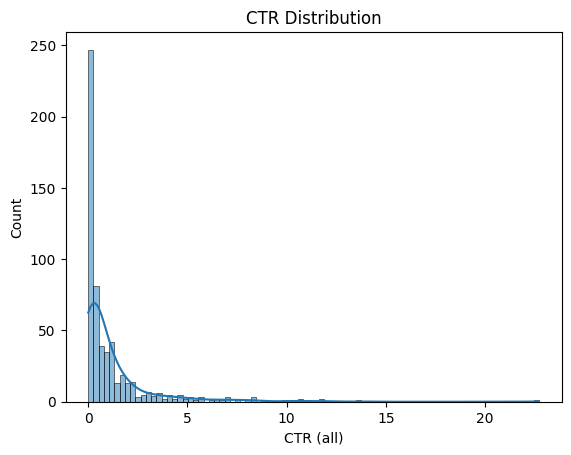

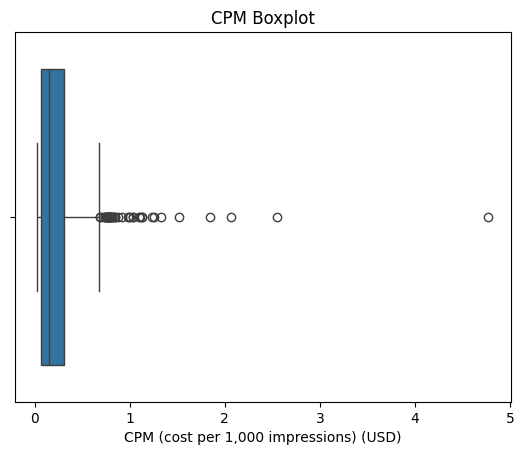

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['CTR (all)'], kde=True)
plt.title("CTR Distribution")
plt.show()

sns.boxplot(x=df['CPM (cost per 1,000 impressions) (USD)'])
plt.title("CPM Boxplot")
plt.show()


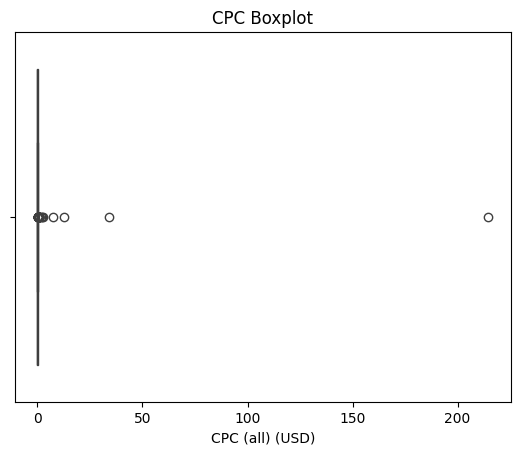

In [4]:
sns.boxplot(x=df['CPC (all) (USD)'])
plt.title("CPC Boxplot")
plt.show()

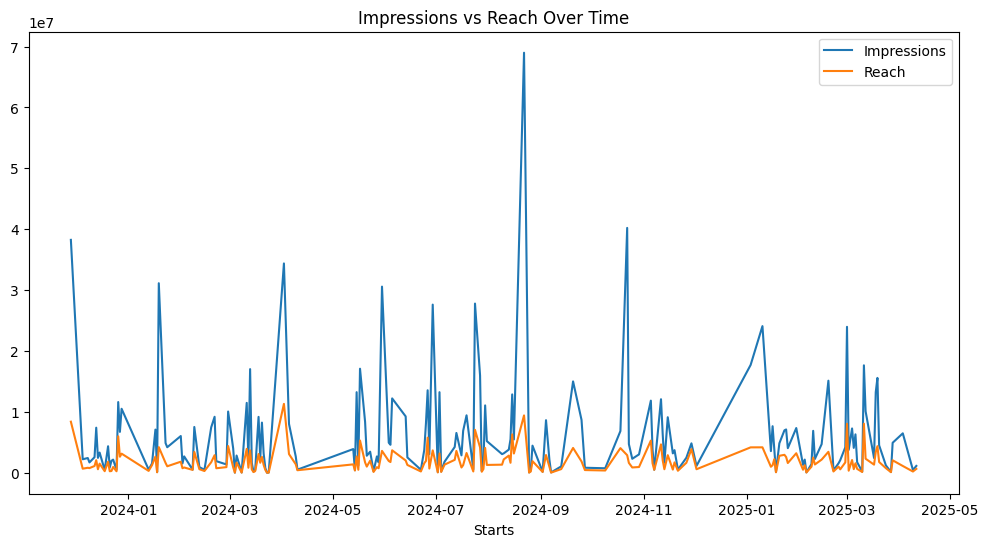

In [5]:
df['Starts'] = pd.to_datetime(df['Starts'])


daily = df.groupby(df['Starts'].dt.date).agg({
    'Amount spent': 'sum',
    'Reach': 'sum',
    'Impressions': 'sum',
    'CTR (all)': 'mean',
    'CPM (cost per 1,000 impressions) (USD)': 'mean'
})


daily[['Impressions', 'Reach']].plot(figsize=(12, 6), title="Impressions vs Reach Over Time")
plt.show()


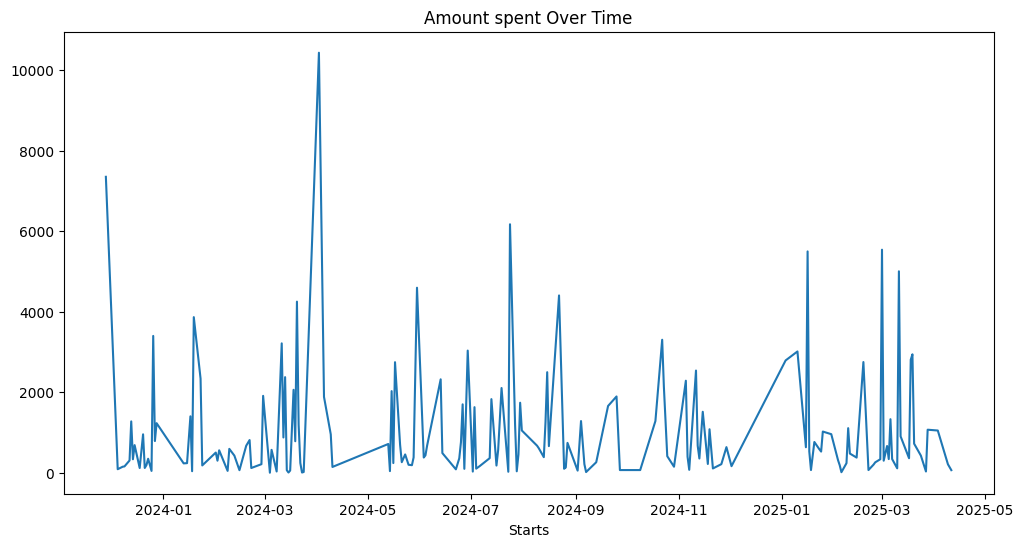

In [6]:

daily['Amount spent'].plot(figsize=(12, 6), title="Amount spent Over Time")
plt.show()


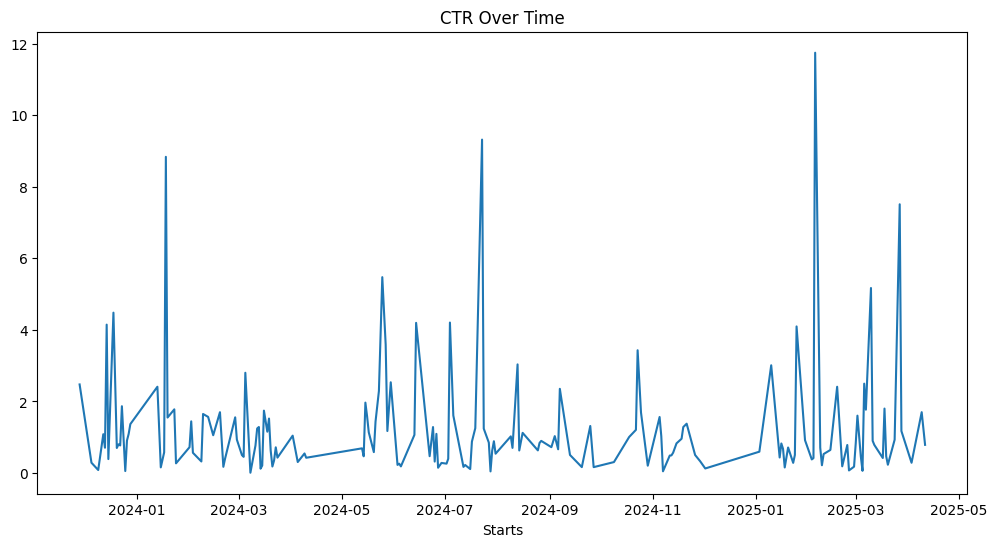

In [7]:
daily['CTR (all)'].plot(figsize=(12, 6), title="CTR Over Time")
plt.show()


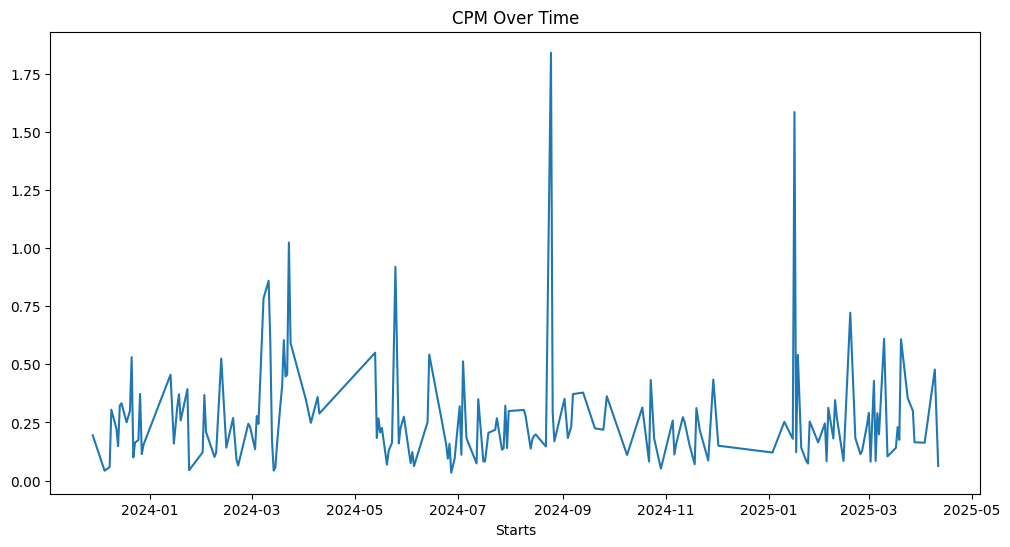

In [8]:
daily['CPM (cost per 1,000 impressions) (USD)'].plot(figsize=(12, 6), title="CPM Over Time")
plt.show()

In [9]:
# Calculate skewness for key numeric columns
df[['CTR (all)', 'CPC (all) (USD)', 'CPM (cost per 1,000 impressions) (USD)', 'Post engagements']].skew()


CTR (all)                                  4.322711
CPC (all) (USD)                           22.965644
CPM (cost per 1,000 impressions) (USD)     5.915443
Post engagements                           4.446205
dtype: float64

In [10]:
import numpy as np

# Add transformed columns
df['log_CPC'] = np.log1p(df['CPC (all) (USD)'])  # log(1 + x)
df['log_CPM'] = np.log1p(df['CPM (cost per 1,000 impressions) (USD)'])
df['log_engagements'] = np.log1p(df['Post engagements'])


In [11]:
# Calculate skewness for key numeric columns
df[['log_CPC', 'log_CPM', 'log_engagements']].skew()


log_CPC            11.102656
log_CPM             2.394810
log_engagements    -0.342659
dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
df[['scaled_CTR']] = scaler.fit_transform(df[['CTR (all)']])


In [13]:
df[['scaled_CTR']].skew()

scaled_CTR    4.322711
dtype: float64

## Skewness Summary:

- `CPC` remains highly skewed after log transform (Skewness: 11.10)
- `CPM` improved, but still skewed (Skewness: 2.39)
- `Post engagements` is close to normal after log transform
- `CTR` is extremely skewed (even after MinMax scaling)

### Next Step:
Handle skewness during Feature Engineering using:
- Advanced transformations (log, square root, etc.)
- Skew-tolerant models (e.g., Random Forest, XGBoost)
- Outlier clipping or capping if needed

In [14]:
# Check how many unique objectives exist
df['Objective'].value_counts()


Objective
Awareness       293
Engagement      154
Traffic         108
App Installs     16
Sales             1
Name: count, dtype: int64

In [15]:
# Check how many unique objectives exist
df['Result indicator'].value_counts()


Result indicator
reach                                                          272
actions:post_engagement                                        110
actions:link_click                                             108
video_thruplay_watched_actions                                  64
actions:mobile_app_install                                      16
actions:offsite_conversion.fb_pixel_purchase                     1
actions:onsite_conversion.messaging_conversation_started_7d      1
Name: count, dtype: int64

In [16]:
# Filter only Video Views campaigns (result = video_thruplay_watched_actions)
video_df = df[df['Result indicator'] == 'video_thruplay_watched_actions']


In [17]:
# Filter only traffic campaigns (result = link click)
traffic_df = df[df['Result indicator'] == 'actions:link_click']

In [18]:
# Filter only Engagement campaigns (result = actions:post_engagement)
engagement_df = df[df['Result indicator'] == 'actions:post_engagement']

In [19]:
# Filter only reach campaigns (result = reach)
reach_df = df[df['Result indicator'] == 'reach']

In [20]:
# Filter only reach campaigns (result = actions:mobile_app_install)
app_installs_df = df[df['Result indicator'] == 'actions:mobile_app_install']

In [61]:
traffic_df = df[df['Result indicator'] == 'actions:link_click'].copy()


In [62]:
traffic_df[['CTR (all)', 'CPC (all) (USD)', 'Amount spent', 'Reach', 'Impressions', 'Clicks (all)']].describe()


,CTR (all),CPC (all) (USD),Amount spent,Reach,Impressions,Clicks (all)
count,108.000000,108.000000,108.000000,1.080000e+02,1.080000e+02,108.000000
mean,1.760757,0.017340,588.750463,8.020372e+05,4.273537e+06,51188.962963
std,2.008604,0.017042,812.893907,6.637246e+05,7.709408e+06,87505.635592
min,0.251071,0.001690,3.430000,1.584300e+04,3.990400e+04,936.000000
25%,0.952567,0.007280,193.285000,3.663428e+05,1.208817e+06,15201.500000
50%,1.188735,0.010568,349.060000,6.440300e+05,2.059060e+06,21838.500000
75%,1.690822,0.019446,583.520000,9.528098e+05,3.719936e+06,41013.250000
max,11.842750,0.105104,4505.810000,3.430373e+06,5.579910e+07,556677.000000


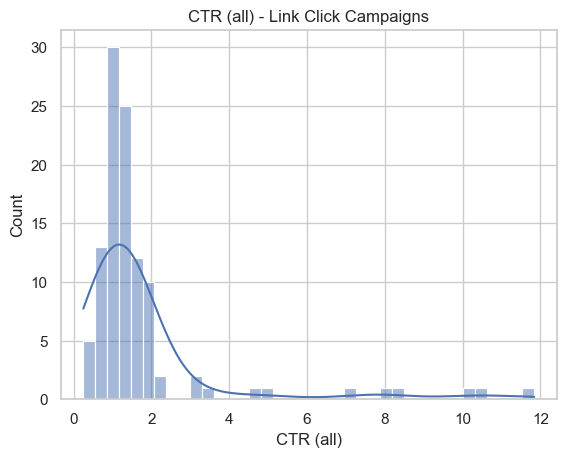

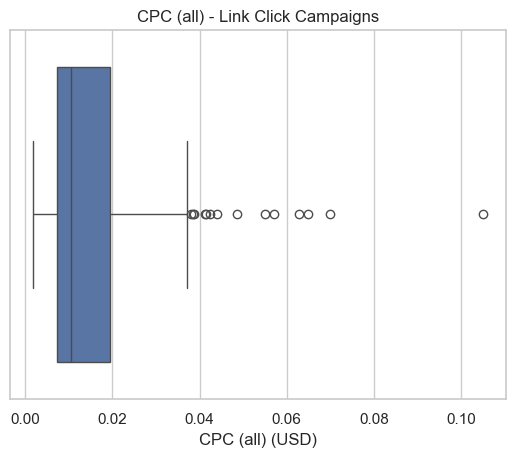

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram - CTR
sns.histplot(traffic_df['CTR (all)'], kde=True)
plt.title("CTR (all) - Link Click Campaigns")
plt.show()

# Boxplot - CPC
sns.boxplot(x=traffic_df['CPC (all) (USD)'])
plt.title("CPC (all) - Link Click Campaigns")
plt.show()


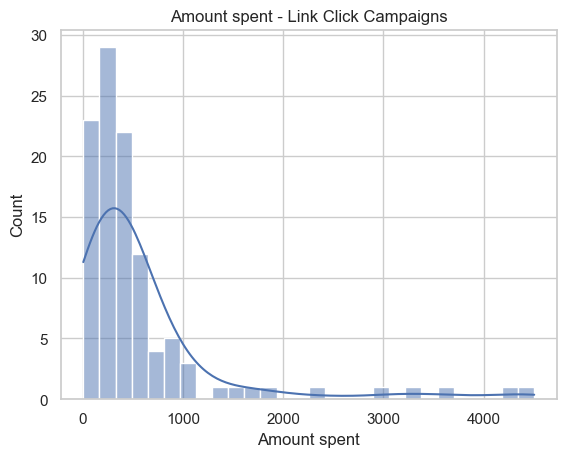

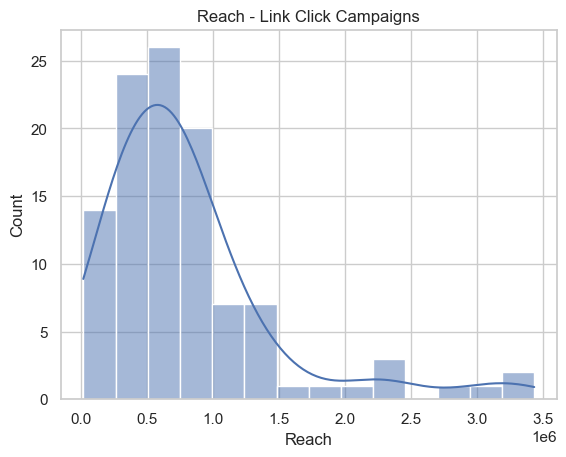

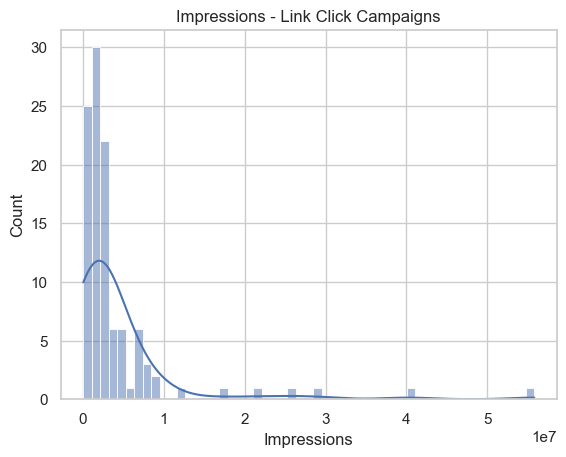

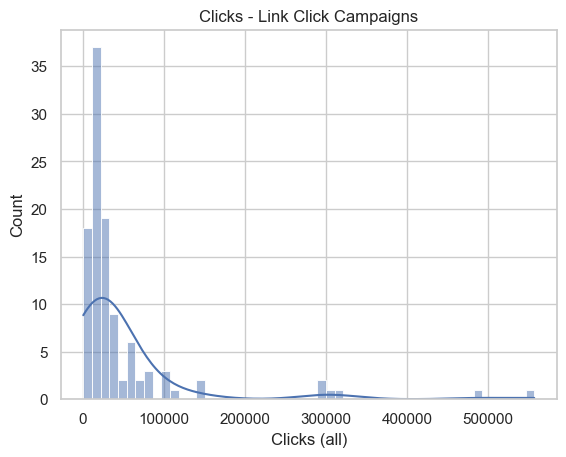

In [64]:
# Histogram - Amount spent
sns.histplot(traffic_df['Amount spent'], kde=True)
plt.title("Amount spent - Link Click Campaigns")
plt.show()

# Histogram - Reach
sns.histplot(traffic_df['Reach'], kde=True)
plt.title("Reach - Link Click Campaigns")
plt.show()

# Histogram - Impressions
sns.histplot(traffic_df['Impressions'], kde=True)
plt.title("Impressions - Link Click Campaigns")
plt.show()

# Histogram - Clicks
sns.histplot(traffic_df['Clicks (all)'], kde=True)
plt.title("Clicks - Link Click Campaigns")
plt.show()



In [65]:
# Calculate skewness for key numeric columns
traffic_df[['CTR (all)', 'CPC (all) (USD)', 'Amount spent', 'Reach', 'Impressions', 'Clicks (all)']].skew()


CTR (all)          3.476701
CPC (all) (USD)    2.336314
Amount spent       3.205584
Reach              2.078450
Impressions        4.479907
Clicks (all)       3.902869
dtype: float64

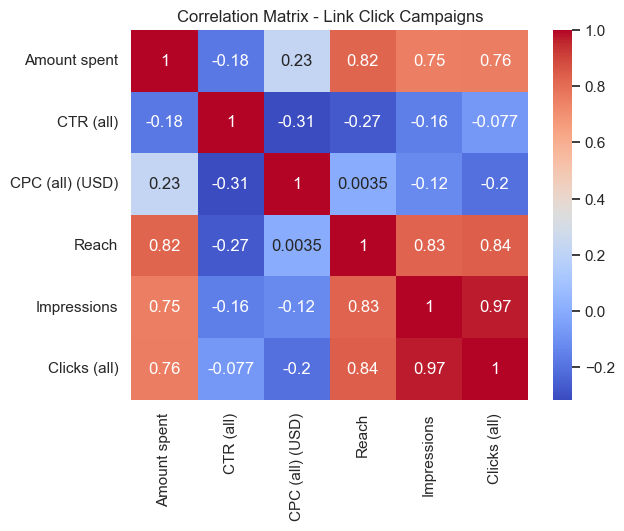

In [66]:
traffic_kpis = ['Amount spent', 'CTR (all)', 'CPC (all) (USD)', 'Reach', 'Impressions', 'Clicks (all)']

corr_traffic = traffic_df[traffic_kpis].corr()

sns.heatmap(corr_traffic, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Link Click Campaigns")
plt.show()

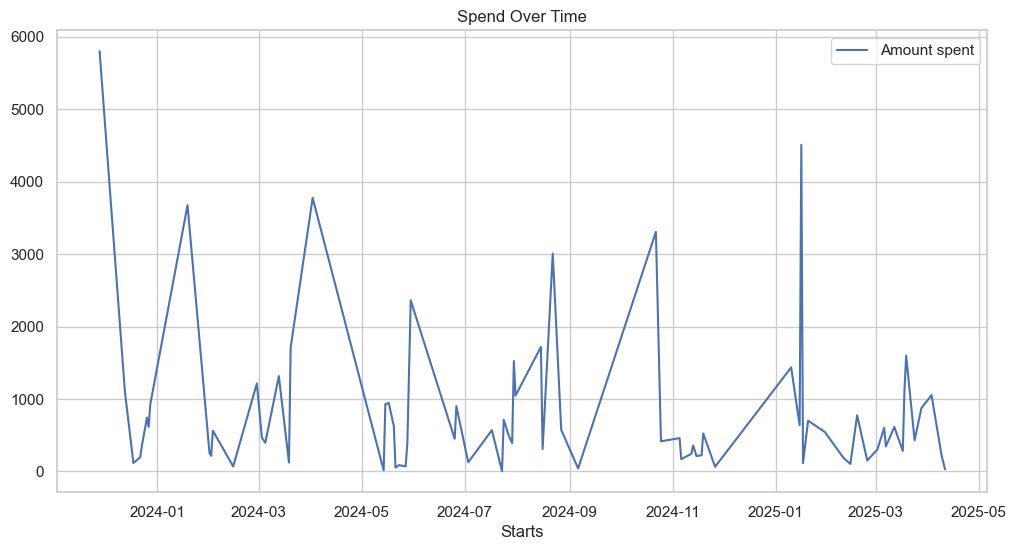

In [67]:
traffic_df['Starts'] = pd.to_datetime(traffic_df['Starts'])

daily_traffic = traffic_df.groupby(traffic_df['Starts'].dt.date).agg({
    'Amount spent': 'sum',
    'CTR (all)': 'mean',
    'CPC (all) (USD)': 'mean',
    'Reach': 'sum',
    'Impressions': 'sum'
})

# Plot spend vs CTR
daily_traffic[['Amount spent']].plot(figsize=(12, 6), title="Spend Over Time")
plt.show()


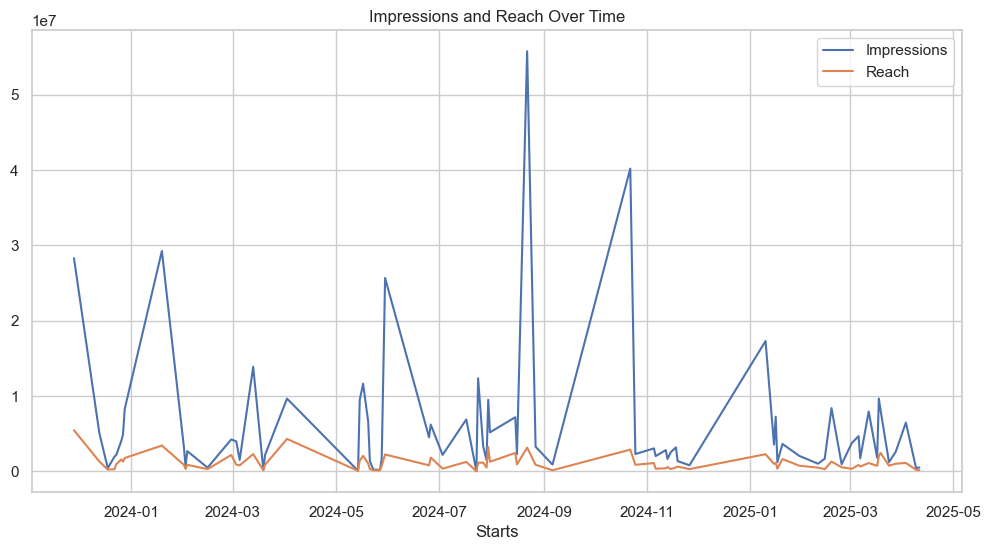

In [68]:
traffic_df['Starts'] = pd.to_datetime(traffic_df['Starts'])

daily_traffic = traffic_df.groupby(traffic_df['Starts'].dt.date).agg({
    'Amount spent': 'sum',
    'CTR (all)': 'mean',
    'CPC (all) (USD)': 'mean',
    'Reach': 'sum',
    'Impressions': 'sum'
})

# Plot spend vs CTR
daily_traffic[['Impressions', 'Reach']].plot(figsize=(12, 6), title="Impressions and Reach Over Time")
plt.show()


In [69]:
# Properly copy the filtered result into a new DataFrame
traffic_df = df[df['Result indicator'] == 'actions:link_click'].copy()


In [70]:
import numpy as np

traffic_df['log_CTR'] = np.log1p(traffic_df['CTR (all)'])
traffic_df['log_CPC'] = np.log1p(traffic_df['CPC (all) (USD)'])
traffic_df['log_spend'] = np.log1p(traffic_df['Amount spent'])
traffic_df['log_reach'] = np.log1p(traffic_df['Reach'])
traffic_df['log_impressions'] = np.log1p(traffic_df['Impressions'])
traffic_df['log_clicks'] = np.log1p(traffic_df['Clicks (all)'])


In [71]:
traffic_df[['log_CTR', 'log_CPC', 'log_spend', 'log_reach', 'log_impressions', 'log_clicks']].skew()


log_CTR            2.113729
log_CPC            2.258743
log_spend         -0.463982
log_reach         -0.843549
log_impressions   -0.173689
log_clicks         0.386854
dtype: float64

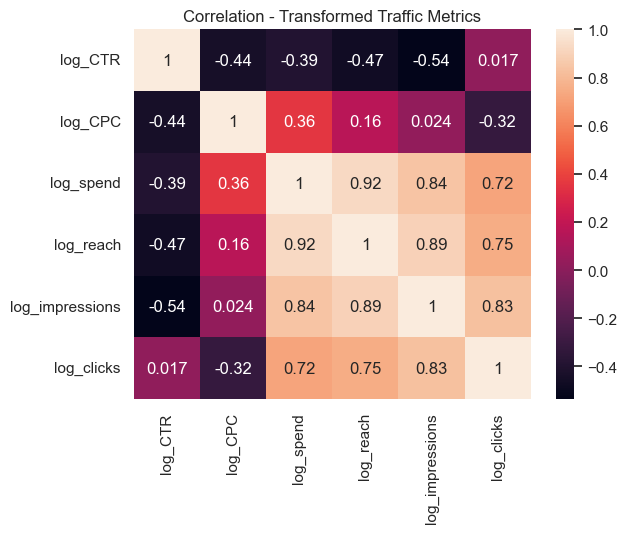

In [72]:
sns.heatmap(traffic_df[['log_CTR', 'log_CPC', 'log_spend', 'log_reach', 'log_impressions', 'log_clicks']].corr(), annot=True)
plt.title("Correlation - Transformed Traffic Metrics")
plt.show()

##  Skewness Transformation Summary - `link click`

We conducted skewness analysis on the key KPIs for traffic-focused campaigns and applied log1p transformations to normalize distributions. Here are the post-transformation skewness values:

| Feature           | Skewness     | Interpretation                                       |
|------------------|--------------|------------------------------------------------------|
| `log_CTR`        | 2.11         | Moderately skewed — improved from 3.48               |
| `log_CPC`        | 2.25         | Improved but still skewed — acceptable for trees     |
| `log_spend`      | -0.46        | Slightly left-skewed — no issue                      |
| `log_reach`      | -0.84        | Acceptably skewed — usable directly                  |
| `log_impressions`| -0.17        | Nearly normal                                        |
| `log_clicks`     | 0.38         | Low skew — suitable for modeling                     |

**Conclusion:** Log transformation significantly reduced skewness, especially in features like CPC, CTR, and Spend. These `log_` features will be used in modeling to ensure stability and improved performance.


##  Correlation Matrix Insights – Transformed Traffic Campaigns

We analyzed the correlation matrix of log-transformed metrics for campaigns optimized for `link clicks` (`actions:link_click`). The goal was to identify redundant features, key drivers of CTR and CPC, and potential issues with multicollinearity.

---

###  Key Observations:

####  CTR (Click-Through Rate) has negative correlations with volume metrics:
- `log_CTR` vs. `log_impressions` → **-0.54**: CTR decreases as impressions increase (likely due to audience fatigue or poor targeting).
- `log_CTR` vs. `log_reach` → **-0.47**: Broad reach often means diluted engagement quality.
- `log_CTR` vs. `log_CPC` → **-0.44**: Lower CTR is associated with **higher** cost per click — expected trend.
- `log_CTR` vs. `log_spend` → **-0.39**: Increasing budget does not necessarily improve CTR.
- `log_CTR` vs. `log_clicks` → **0.017**: Very weak correlation — CTR is a rate, not a volume.

####  Strong positive correlations among spend-related metrics:
- `log_spend` vs. `log_reach` → **0.92**
- `log_spend` vs. `log_impressions` → **0.84**
- `log_spend` vs. `log_clicks` → **0.72**

These relationships are expected: increased budget naturally leads to greater reach, more impressions, and a higher number of clicks.

---

###  Modeling Implications:

| Goal             | Recommendation                                                                 |
|------------------|---------------------------------------------------------------------------------|
| Predicting CTR   | Avoid using all volume metrics together (drop 1 of `log_spend`, `log_reach`, `log_impressions`) to reduce multicollinearity. CTR is **negatively impacted** by broad reach and high impressions. |
| Predicting CPC   | Include `log_CTR`, `log_clicks`, and possibly `log_spend`. Lower CTR leads to higher CPC. |
| Predicting Clicks| Use `log_spend`, `log_reach`, and `log_impressions` — these are strongly and logically correlated with clicks. |

---

###  Summary:

- CTR is best modeled with select predictors, avoiding redundant volume metrics.
- Tree-based models (like XGBoost) can better handle feature interactions and multicollinearity if we want to keep all features.
- These insights will guide feature selection and modeling decisions in the next step.



In [31]:
engagement_df = df[df['Result indicator'] == 'actions:post_engagement'].copy()


In [32]:
engagement_df[['Amount spent', 'Reach', 'Impressions', 'Page engagement', 'Post comments', 'Post engagements', 'Post reactions', 'Post saves', 'Post shares', 'Cost per Page engagement (USD)', 'Cost per post engagement (USD)']].describe()

,Amount spent,Reach,Impressions,Page engagement,Post comments,Post engagements,Post reactions,Post saves,Post shares,Cost per Page engagement (USD),Cost per post engagement (USD)
count,110.000000,1.100000e+02,1.100000e+02,1.100000e+02,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000
mean,440.971909,4.571058e+05,1.259667e+06,5.796360e+04,343.881818,5.793456e+04,8931.881818,44.554545,85.172727,0.019000,0.019019
std,651.597766,5.379969e+05,2.206153e+06,1.323103e+05,618.708550,1.322917e+05,15947.888226,80.603069,152.313225,0.014305,0.014315
min,2.840000,7.970000e+03,9.255000e+03,2.190000e+02,0.000000,2.190000e+02,4.000000,0.000000,0.000000,0.000173,0.000173
25%,78.935000,1.054995e+05,1.764795e+05,5.027500e+03,20.250000,5.026000e+03,1524.250000,2.000000,14.250000,0.010464,0.010464
50%,144.445000,2.184400e+05,3.253760e+05,1.015050e+04,58.000000,1.014200e+04,3202.000000,14.500000,26.500000,0.019442,0.019444
75%,526.140000,6.759170e+05,1.392150e+06,5.205625e+04,426.500000,5.205550e+04,7468.750000,53.000000,96.250000,0.024934,0.024984
max,3691.150000,2.797200e+06,1.424337e+07,1.016632e+06,3217.000000,1.016593e+06,108060.000000,623.000000,1215.000000,0.093221,0.093221


In [33]:
# Calculate skewness for key numeric columns
traffic_df[['Amount spent', 'Reach', 'Impressions', 'Page engagement', 'Post comments', 'Post engagements', 'Post reactions', 'Post saves', 'Post shares', 'Cost per Page engagement (USD)', 'Cost per post engagement (USD)']].skew()


Amount spent                      3.205584
Reach                             2.078450
Impressions                       4.479907
Page engagement                   3.261229
Post comments                     2.554258
Post engagements                  3.261086
Post reactions                    6.256266
Post saves                        8.770038
Post shares                       5.330948
Cost per Page engagement (USD)    1.470682
Cost per post engagement (USD)    1.475896
dtype: float64

In [34]:
# Apply log1p transformations to highly skewed variables
engagement_df['log_spend'] = np.log1p(engagement_df['Amount spent'])
engagement_df['log_reach'] = np.log1p(engagement_df['Reach'])
engagement_df['log_impressions'] = np.log1p(engagement_df['Impressions'])
engagement_df['log_post_eng'] = np.log1p(engagement_df['Post engagements'])
engagement_df['log_comments'] = np.log1p(engagement_df['Post comments'])
engagement_df['log_reactions'] = np.log1p(engagement_df['Post reactions'])
engagement_df['log_saves'] = np.log1p(engagement_df['Post saves'])
engagement_df['log_shares'] = np.log1p(engagement_df['Post shares'])
engagement_df['log_cost_per_eng'] = np.log1p(engagement_df['Cost per post engagement (USD)'])

In [35]:
engagement_df[['log_spend', 'log_reach', 'log_impressions', 'log_post_eng',
               'log_comments', 'log_reactions', 'log_saves', 'log_shares',
               'log_cost_per_eng']].skew()

log_spend          -0.156104
log_reach          -0.310947
log_impressions    -0.029829
log_post_eng        0.367901
log_comments       -0.036257
log_reactions      -0.754194
log_saves           0.006893
log_shares         -0.197637
log_cost_per_eng    1.389971
dtype: float64

##  Final Skewness Analysis – `post engagement`

After applying log transformations to the highly skewed engagement features, we re-evaluated the skewness. The majority of variables now fall within a model-safe range:

| Feature             | Post-Transformation Skewness | Status     |
|---------------------|-------------------------------|------------|
| `log_spend`         | -0.16                         | ✅ Good     |
| `log_reach`         | -0.31                         | ✅ Good     |
| `log_impressions`   | -0.03                         | ✅ Excellent|
| `log_post_eng`      | 0.37                          | ✅ Good     |
| `log_comments`      | -0.03                         | ✅ Excellent|
| `log_reactions`     | -0.75                         | ⚠️ Slight skew|
| `log_saves`         | 0.01                          | ✅ Excellent|
| `log_shares`        | -0.20                         | ✅ Good     |
| `log_cost_per_eng`  | 1.39                          | ⚠️ Moderate skew|

### Summary: 
The engagement segment is now ready for feature engineering. We’ll use these log-transformed columns to build a predictive model for `Post engagements`, `Cost per Engagement`, or other branding KPIs.


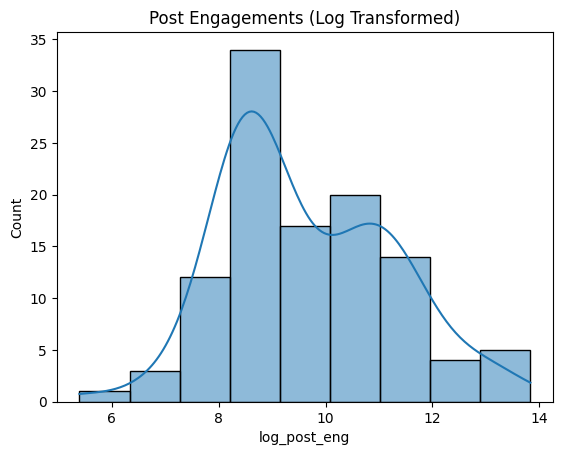

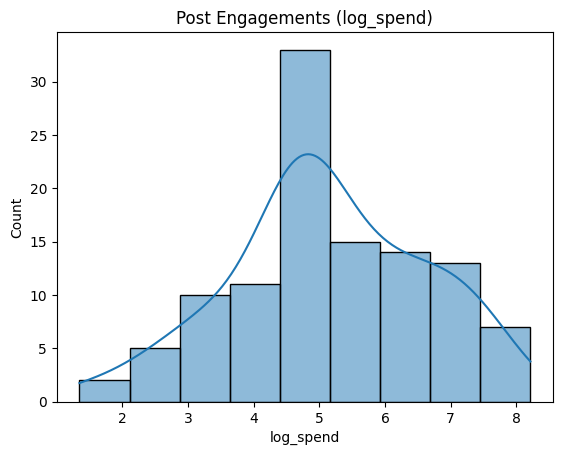

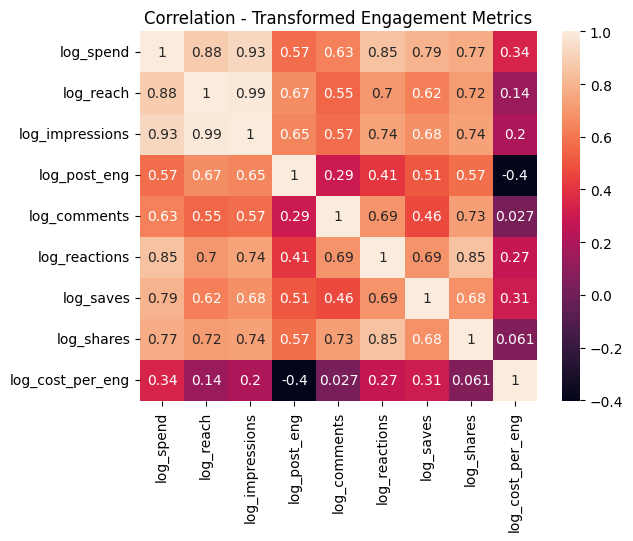

In [36]:
sns.histplot(engagement_df['log_post_eng'], kde=True)
plt.title("Post Engagements (Log Transformed)")
plt.show()

sns.histplot(engagement_df['log_spend'], kde=True)
plt.title("Post Engagements (log_spend)")
plt.show()

sns.heatmap(engagement_df[['log_spend', 'log_reach', 'log_impressions', 'log_post_eng',
               'log_comments', 'log_reactions', 'log_saves', 'log_shares',
               'log_cost_per_eng']].corr(), annot=True)
plt.title("Correlation - Transformed Engagement Metrics")
plt.show()

In [37]:
video_df = df[df['Result indicator'] == 'video_thruplay_watched_actions'].copy()


In [38]:
video_kpis = [
    'Amount spent',
    'Reach',
    'Impressions',
    'ThruPlays',
    '3-second video plays',
    'Video average play time',
    'Thruplays rate %',
    'Cost per ThruPlay (USD)', 
    'Video plays at 25%', 
    'Video plays at 50%', 
    'Video plays at 75%', 
    'Video plays at 95%', 
    'Video plays at 100%',  
    'Video plays', 
    'Cost per ThruPlay (USD)'
]

In [39]:
# Skewness before transformation
video_df[video_kpis].skew()

Amount spent               2.570518
Reach                      2.402272
Impressions                 1.98969
ThruPlays                  2.294675
3-second video plays       2.073315
Video average play time    1.294635
Thruplays rate %           0.196236
Cost per ThruPlay (USD)    1.867996
Video plays at 25%         2.683179
Video plays at 50%         2.812933
Video plays at 75%         2.555748
Video plays at 95%         3.119245
Video plays at 100%        3.228563
Video plays                 2.03503
Cost per ThruPlay (USD)    1.867996
dtype: object

In [40]:
video_df['log_spend'] = np.log1p(video_df['Amount spent'])
video_df['log_reach'] = np.log1p(video_df['Reach'])
video_df['log_impressions'] = np.log1p(video_df['Impressions'])
video_df['log_thruplays'] = np.log1p(video_df['ThruPlays'])
video_df['log_3s'] = np.log1p(video_df['3-second video plays'])
video_df['log_video_25'] = np.log1p(video_df['Video plays at 25%'])
video_df['log_video_50'] = np.log1p(video_df['Video plays at 50%'])
video_df['log_video_75'] = np.log1p(video_df['Video plays at 75%'])
video_df['log_video_95'] = np.log1p(video_df['Video plays at 95%'])
video_df['log_video_100'] = np.log1p(video_df['Video plays at 100%'])
video_df['log_video_plays'] = np.log1p(video_df['Video plays'])
video_df['log_cost_thruplay'] = np.log1p(video_df['Cost per ThruPlay (USD)'])

In [41]:
video_df[[
    'log_spend', 'log_reach', 'log_impressions', 'log_thruplays', 'log_3s',
    'log_video_25', 'log_video_50', 'log_video_75', 'log_video_95',
    'log_video_100', 'log_video_plays', 'log_cost_thruplay', 'Video average play time', 'Thruplays rate %'
]].skew()

log_spend                  0.012837
log_reach                 -0.135869
log_impressions           -0.017086
log_thruplays              0.140623
log_3s                     0.131989
log_video_25              -1.082221
log_video_50              -0.676372
log_video_75              -0.604618
log_video_95              -0.494999
log_video_100             -0.422323
log_video_plays           -0.031014
log_cost_thruplay          1.864163
Video average play time    1.294635
Thruplays rate %           0.196236
dtype: object

##  Post-Transformation Skewness Summary – `video views` (Video Engagement Campaigns)

We performed log transformation on key video engagement KPIs to reduce skewness. Below is a comprehensive summary of each transformed variable and its resulting skewness.

| Feature                         | Skewness After Log1p | Status/Interpretation                         |
|----------------------------------|-----------------------|-----------------------------------------------|
| `log_spend`                      | 0.0128                | ✅ Excellent — near-normal                    |
| `log_reach`                      | -0.1358               | ✅ Excellent                                   |
| `log_impressions`               | -0.0171               | ✅ Excellent                                   |
| `log_thruplays`                 | 0.1406                | ✅ Low skew — model-friendly                  |
| `log_3s`                        | 0.1320                | ✅ Good distribution                          |
| `log_video_25`                 | -1.0822               | ⚠️ Left-skewed, but still usable              |
| `log_video_50`                 | -0.6764               | ✅ Acceptable                                 |
| `log_video_75`                 | -0.6046               | ✅ Acceptable                                 |
| `log_video_95`                 | -0.4950               | ✅ Acceptable                                 |
| `log_video_100`                | -0.4223               | ✅ Acceptable                                 |
| `log_video_plays`              | -0.0310               | ✅ Excellent                                   |
| `log_cost_thruplay`            | 1.8642                | ⚠️ Still skewed — monitor outliers if using linear models |
| `Video average play time`      | 1.2946                | ⚠️ Consider log-transforming or capping       |
| `Thruplays rate %`             | 0.1962                | ✅ Good — left as-is                          |

 **Conclusion:** The dataset is now well-prepared for predictive modeling. All features except `log_cost_thruplay` and `Video average play time` show strong normality or acceptable skew. These two metrics can still be modeled effectively, especially with tree-based algorithms (e.g., Random Forest, XGBoost).


In [42]:
sns.set(style="whitegrid")

In [43]:
video_features = [
    'log_spend', 'log_reach', 'log_impressions', 'log_thruplays',
    'log_3s', 'log_video_25', 'log_video_50', 'log_video_75',
    'log_video_95', 'log_video_100', 'log_video_plays', 'log_cost_thruplay', 'Video average play time', 'Thruplays rate %'
]


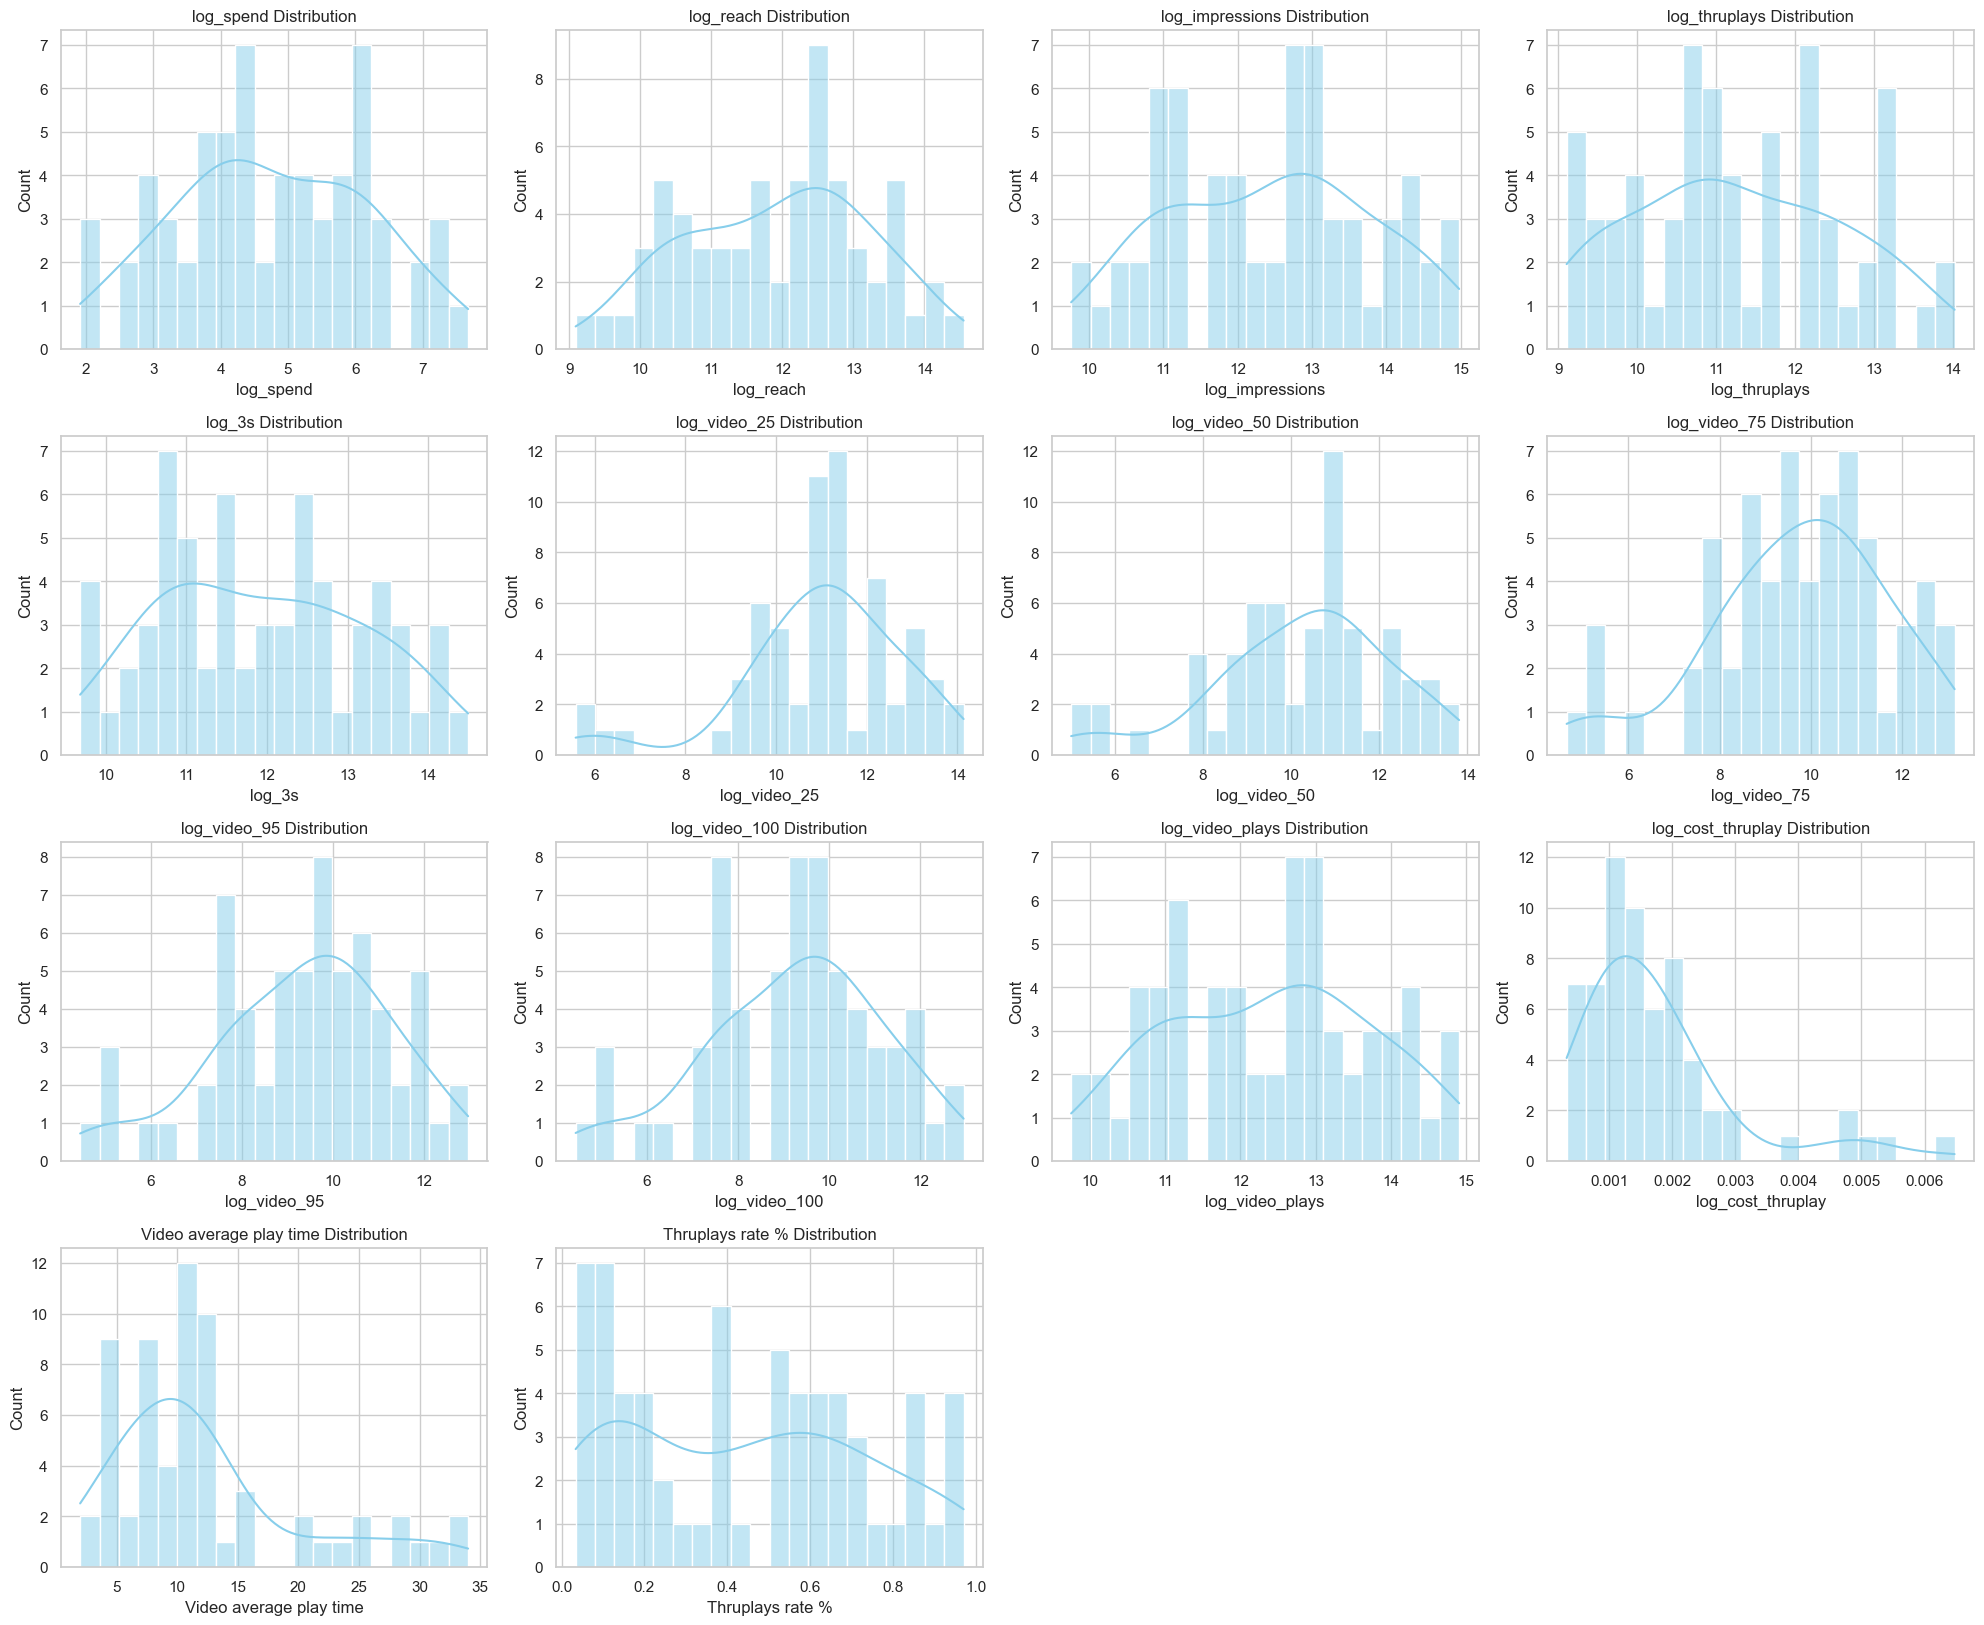

In [44]:
# Set up the plot
plt.figure(figsize=(20, 20))
for i, feature in enumerate(video_features):
    plt.subplot(5, 4, i + 1)
    sns.histplot(video_df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()


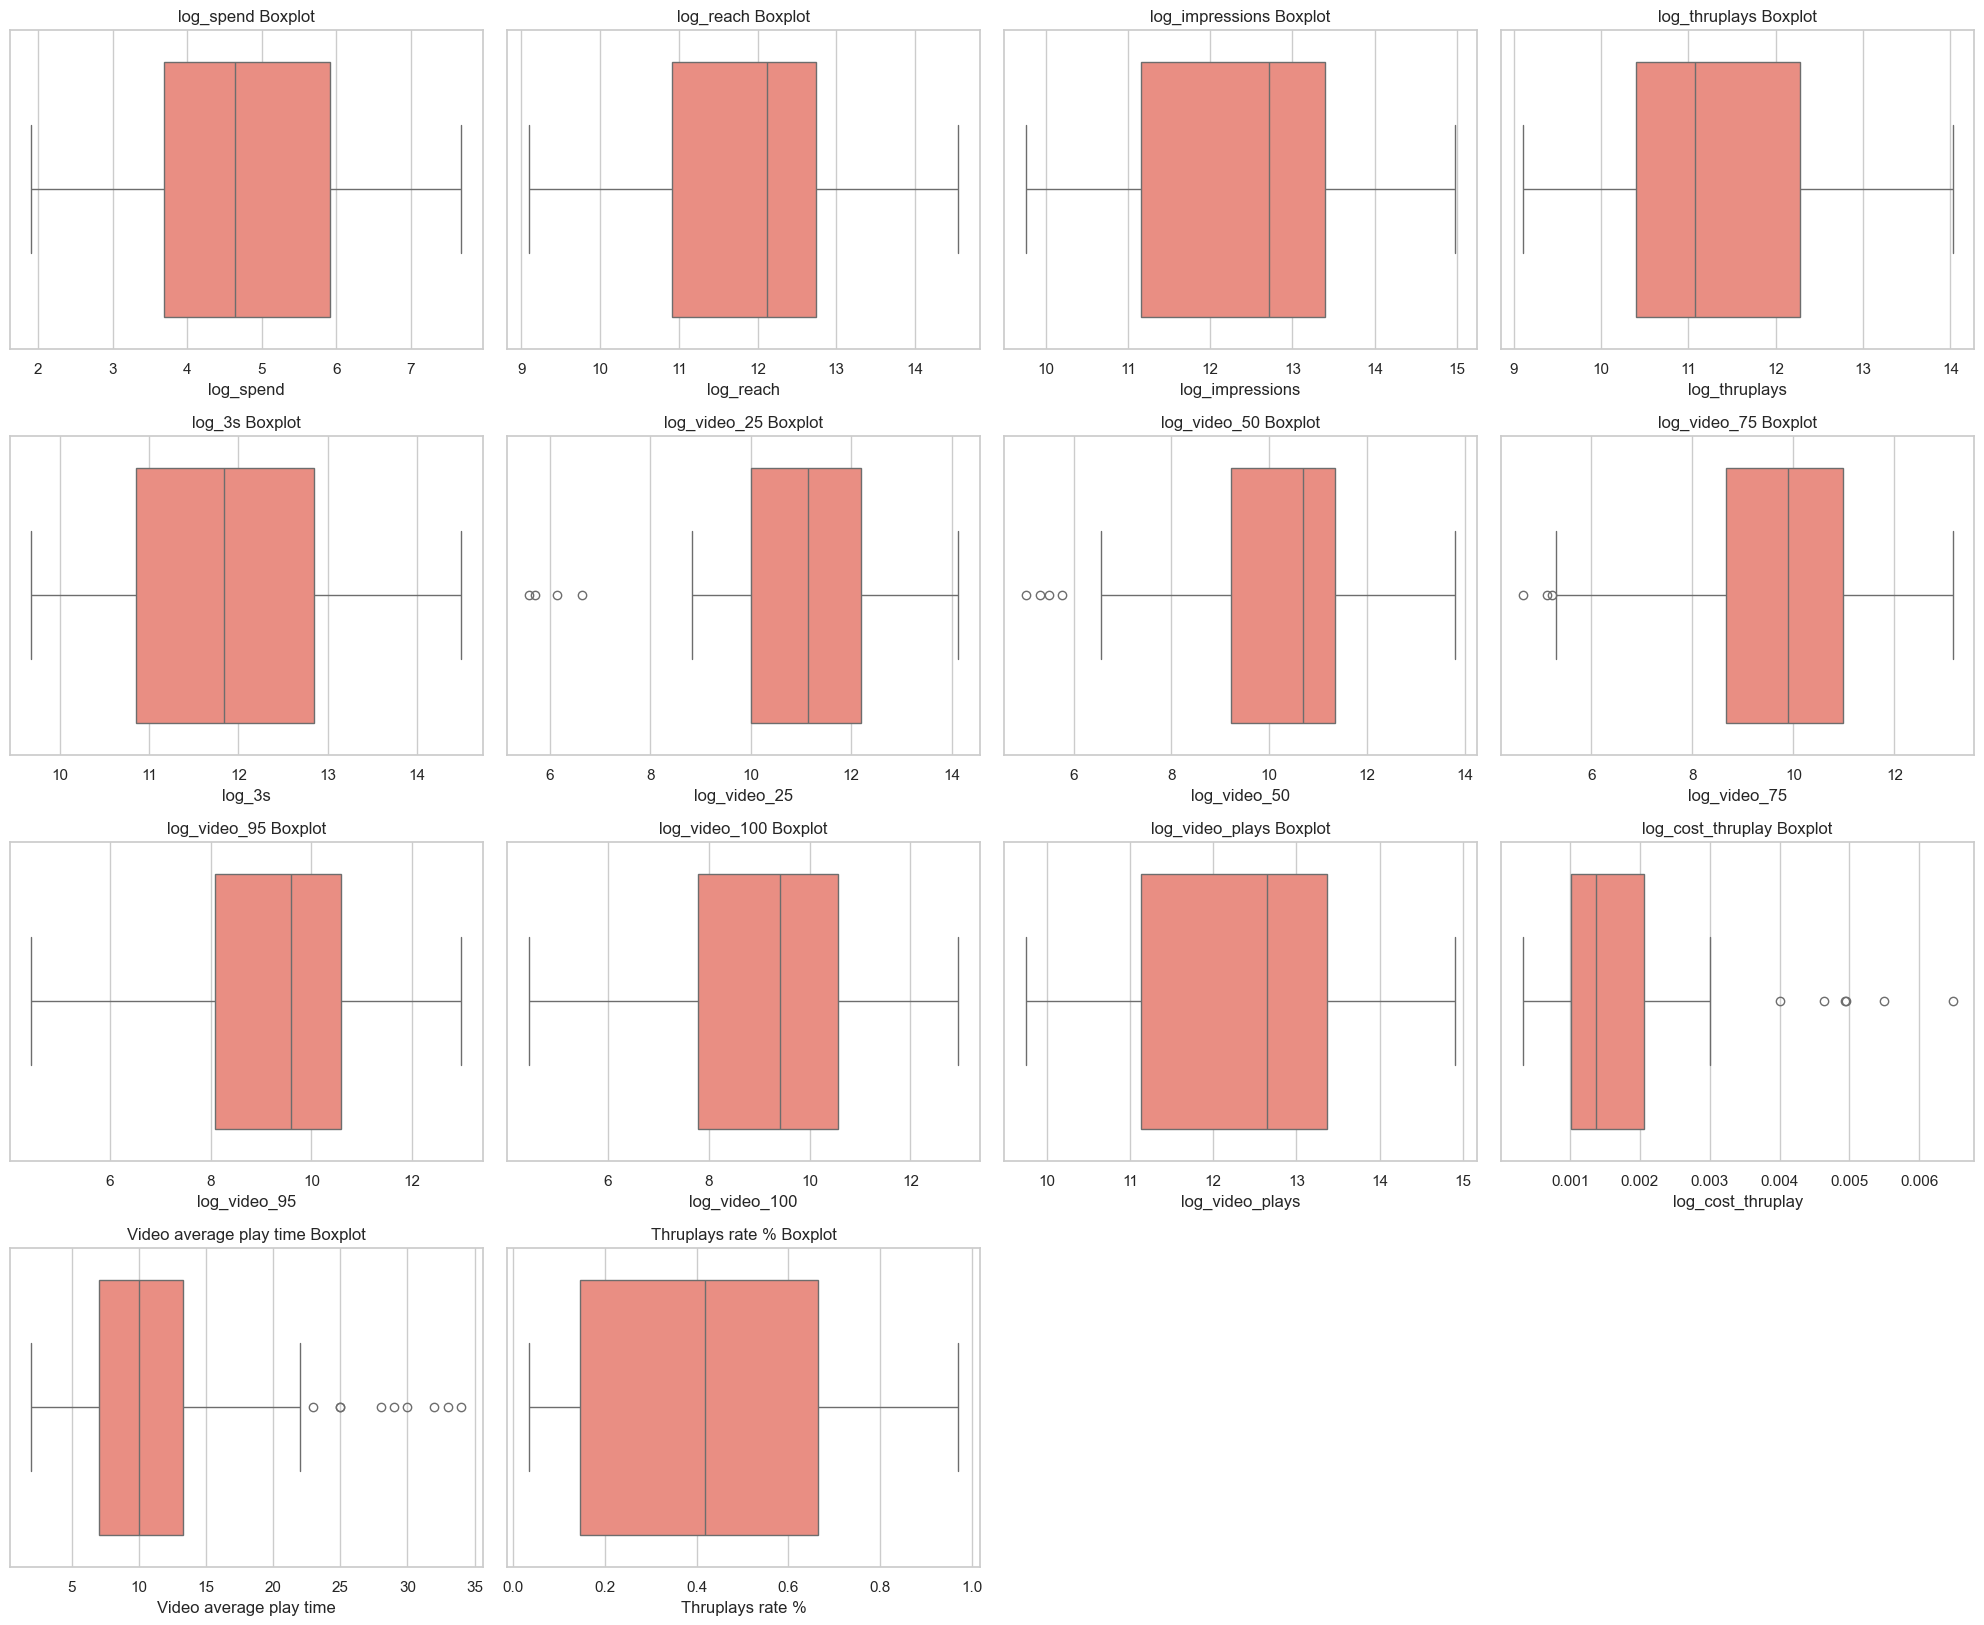

In [45]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(video_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=video_df[feature], color='salmon')
    plt.title(f"{feature} Boxplot")
plt.tight_layout()
plt.show()


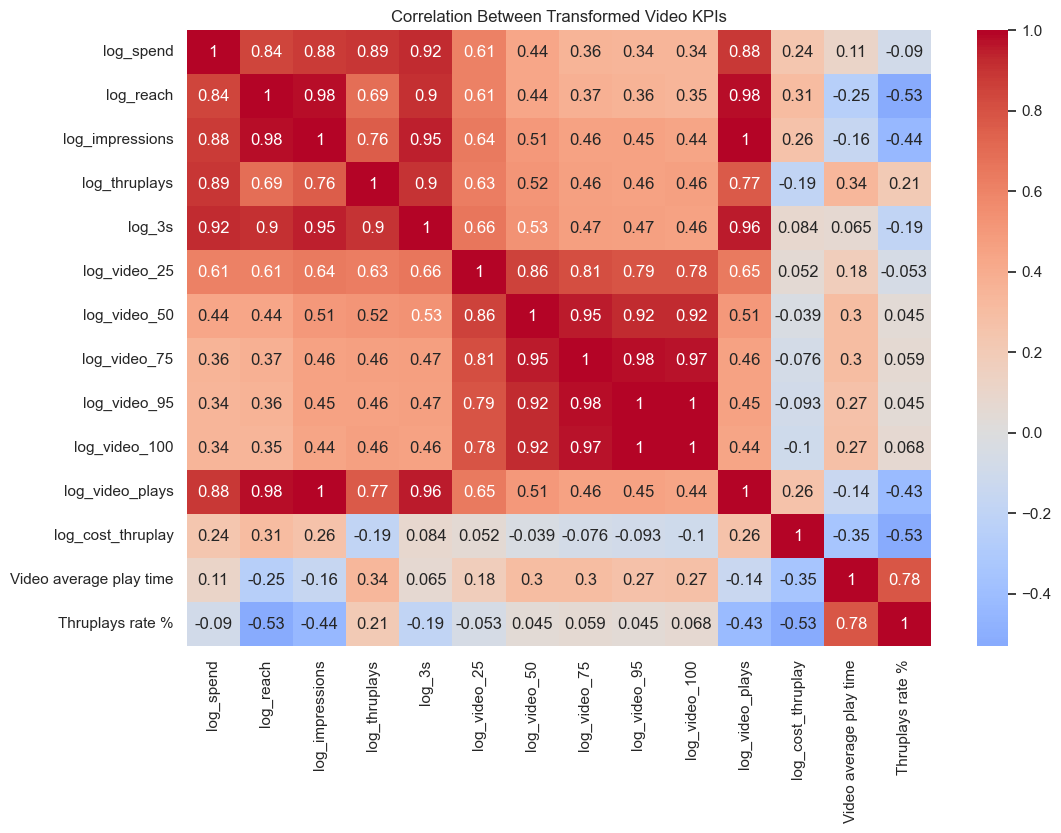

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(video_df[video_features].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Transformed Video KPIs")
plt.show()


## Distribution and Outlier Visualizations – Transformed Video KPIs

To confirm the success of our log transformations, we plotted histograms and boxplots for all key video KPIs. The majority of features now display smoother, bell-shaped distributions with significantly fewer extreme outliers.

These visual confirmations help validate our preprocessing choices and support better predictive performance in the modeling phase.


In [47]:
reach_df = df[df['Result indicator'] == 'reach'].copy()


In [48]:
awareness_kpis = [
    'Amount spent', 'Reach', 'Impressions', 'Frequency', 'CPM (cost per 1,000 impressions) (USD)', 'Cost per 1,000 Accounts Center accounts reached (USD)', 'Views', 'Landing page views', 'Cost per landing page view (USD)'
]

# Check skewness before transformation
reach_df[awareness_kpis].skew()


Amount spent                                             5.550734
Reach                                                    2.287793
Impressions                                              4.533345
Frequency                                                3.569624
CPM (cost per 1,000 impressions) (USD)                   3.871936
Cost per 1,000 Accounts Center accounts reached (USD)    3.446472
Views                                                    2.631901
Landing page views                                       4.482193
Cost per landing page view (USD)                         3.912471
dtype: float64

In [49]:
reach_df['log_spend'] = np.log1p(reach_df['Amount spent'])
reach_df['log_reach'] = np.log1p(reach_df['Reach'])
reach_df['log_impressions'] = np.log1p(reach_df['Impressions'])
reach_df['log_frequency'] = np.log1p(reach_df['Frequency'])
reach_df['log_cpm'] = np.log1p(reach_df['CPM (cost per 1,000 impressions) (USD)'])
reach_df['log_cost_per_accts'] = np.log1p(reach_df['Cost per 1,000 Accounts Center accounts reached (USD)'])
reach_df['log_views'] = np.log1p(reach_df['Views'])
reach_df['log_landing_page_views'] = np.log1p(reach_df['Landing page views'])
reach_df['log_cost_per_lp_view'] = np.log1p(reach_df['Cost per landing page view (USD)'])


In [50]:
reach_df[[
    'log_spend', 'log_reach', 'log_impressions', 'log_frequency',
    'log_cpm', 'log_cost_per_accts', 'log_views',
    'log_landing_page_views', 'log_cost_per_lp_view'
]].skew()


log_spend                -0.204311
log_reach                -1.627900
log_impressions          -1.188738
log_frequency             0.846830
log_cpm                   2.873627
log_cost_per_accts        2.154168
log_views                 0.835790
log_landing_page_views    0.702538
log_cost_per_lp_view      1.209804
dtype: float64

## Final Skewness Summary – Awareness Campaigns (`Result indicator = reach`)

After applying log1p transformations to key awareness KPIs, most features now show acceptable distributions for modeling.

| Feature                      | Post-Log Skewness | Status            |
|-----------------------------|-------------------|-------------------|
| `log_spend`                 | -0.20             | ✅ Normal          |
| `log_reach`                 | -1.63             | ⚠️ Left-skewed     |
| `log_impressions`           | -1.18             | ⚠️ Left-skewed     |
| `log_frequency`             | 0.85              | ✅ Acceptable      |
| `log_cpm`                   | 2.87              | ⚠️ Still skewed    |
| `log_cost_per_accts`        | 2.15              | ⚠️ Moderate skew   |
| `log_views`                 | 0.83              | ✅ Mild skew       |
| `log_landing_page_views`    | 0.70              | ✅ Acceptable      |
| `log_cost_per_lp_view`      | 1.21              | ⚠️ Moderate skew   |

 **Conclusion**: This dataset is now ready for predictive modeling focused on awareness KPIs like CPM, cost-efficiency, and landing page visibility. Tree-based models (like XGBoost or Random Forest) are well-suited to handle the few remaining skewed variables.


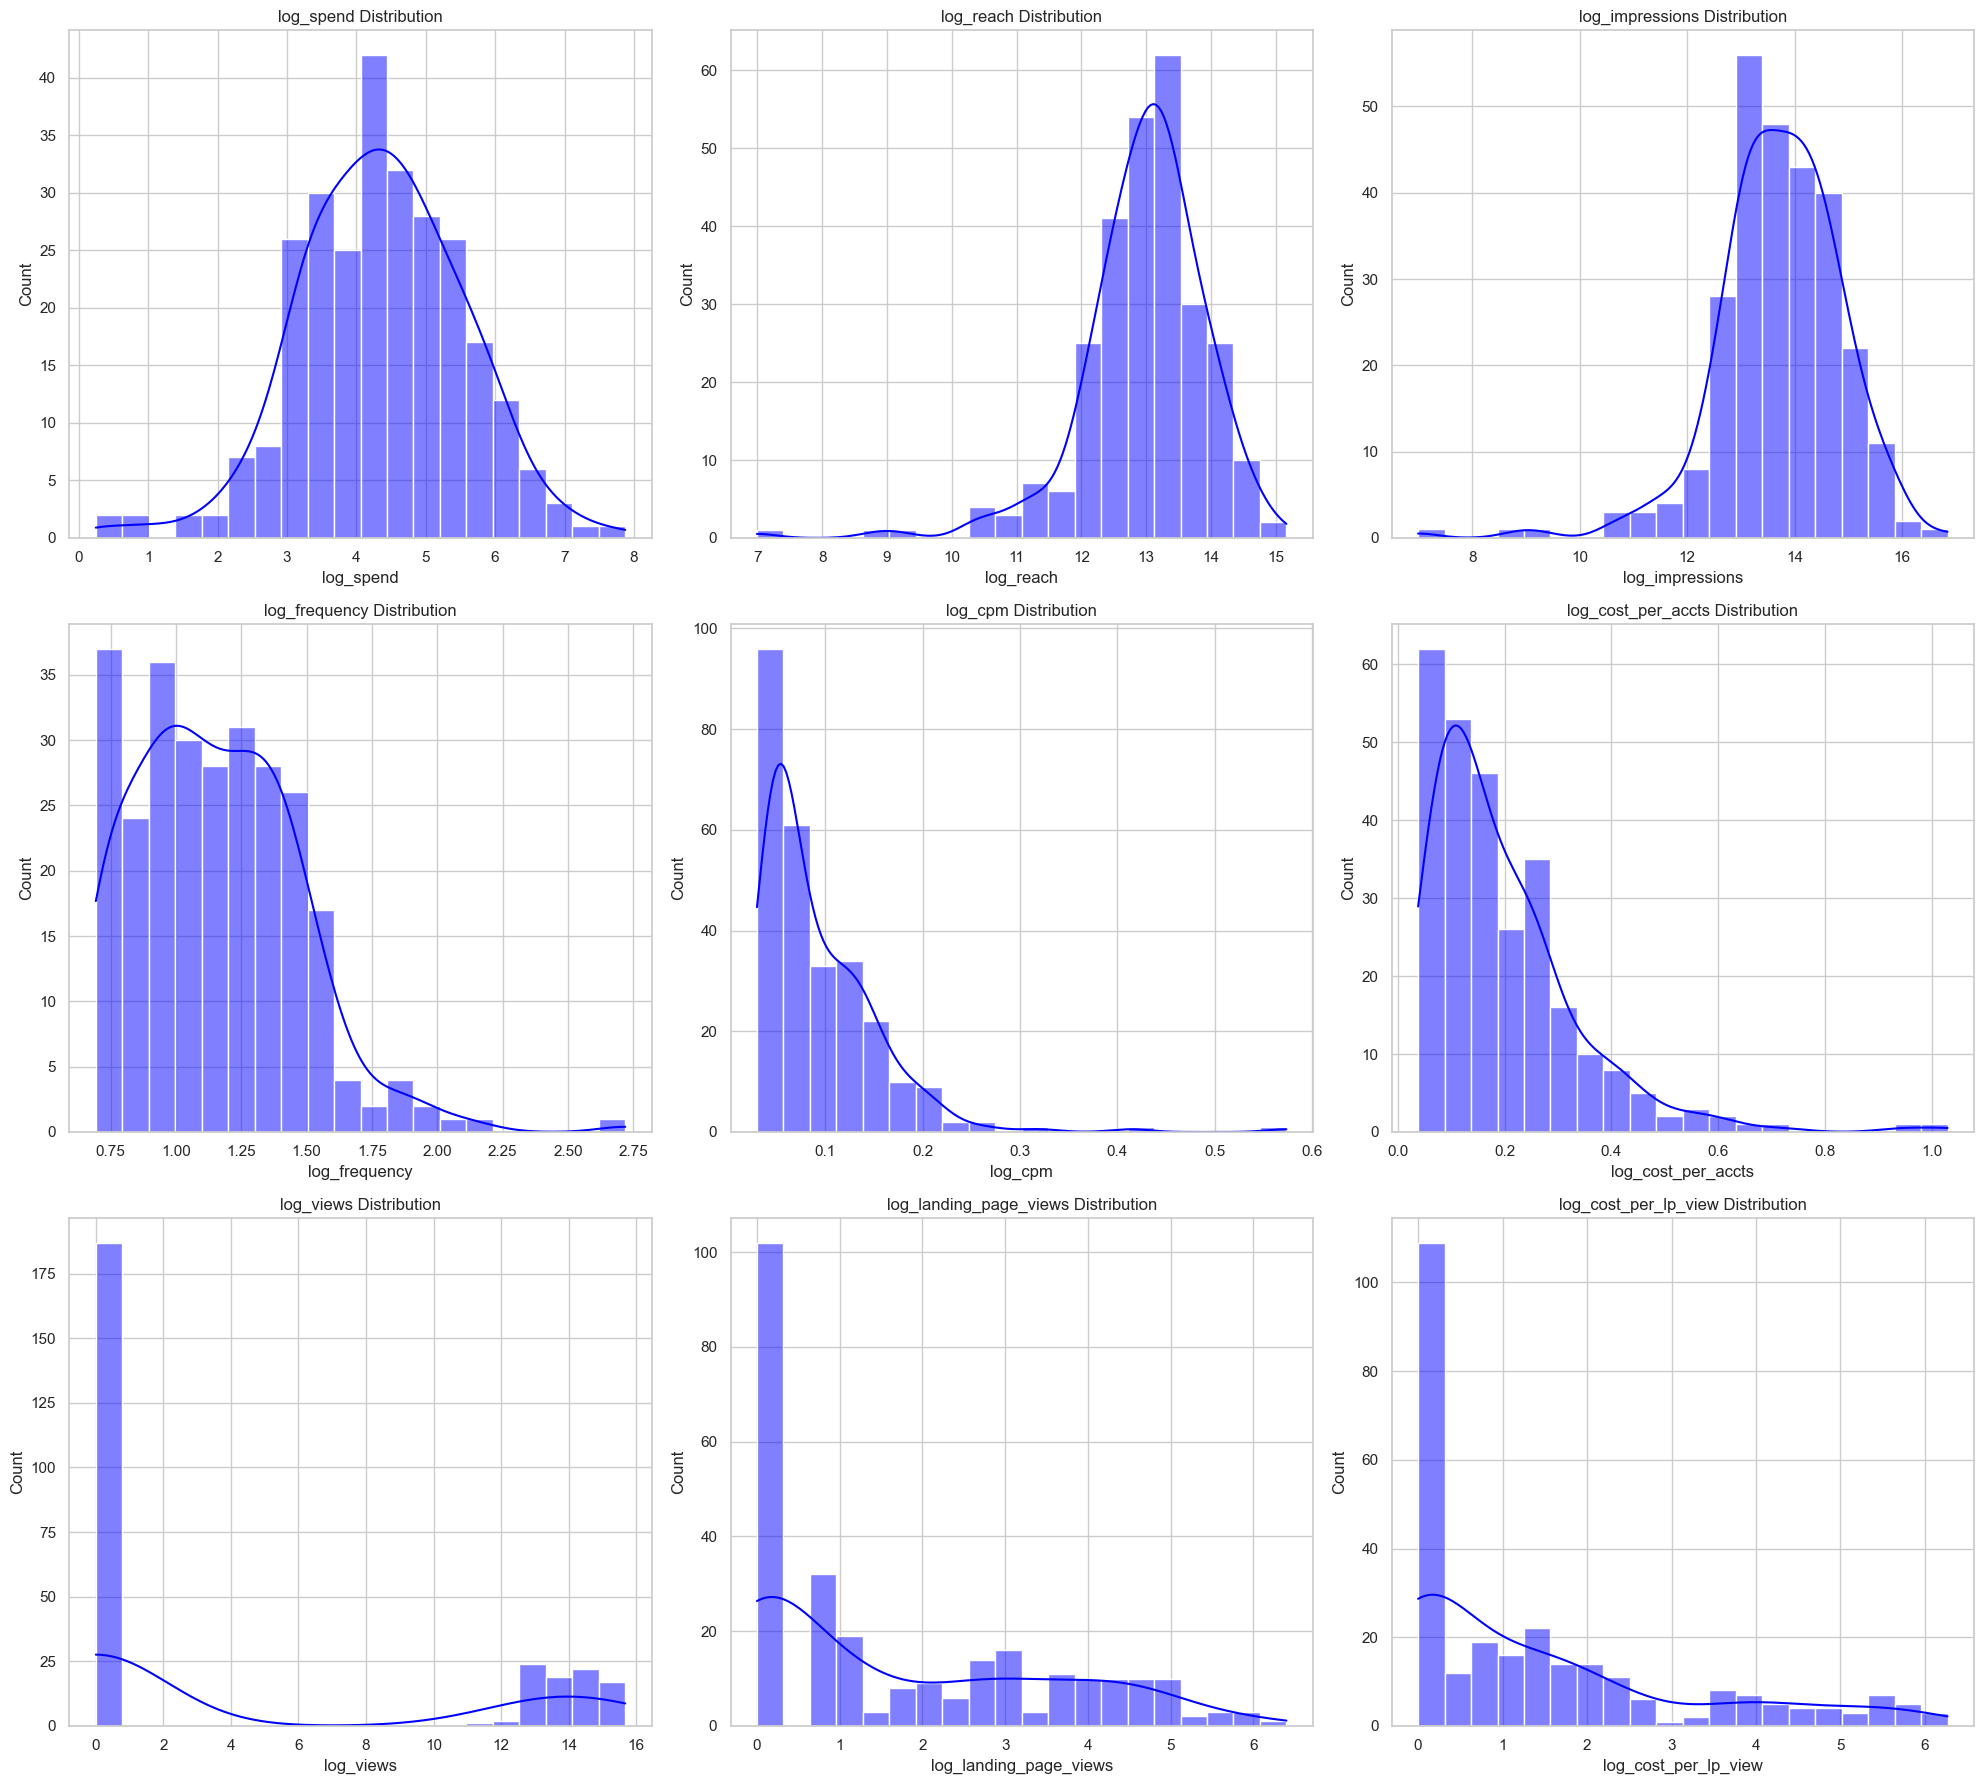

In [51]:
plot_features = [
    'log_spend', 'log_reach', 'log_impressions', 'log_frequency',
    'log_cpm', 'log_cost_per_accts', 'log_views',
    'log_landing_page_views', 'log_cost_per_lp_view'
]

plt.figure(figsize=(20, 18))
for i, feature in enumerate(plot_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(reach_df[feature], kde=True, color='blue', bins=20)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()


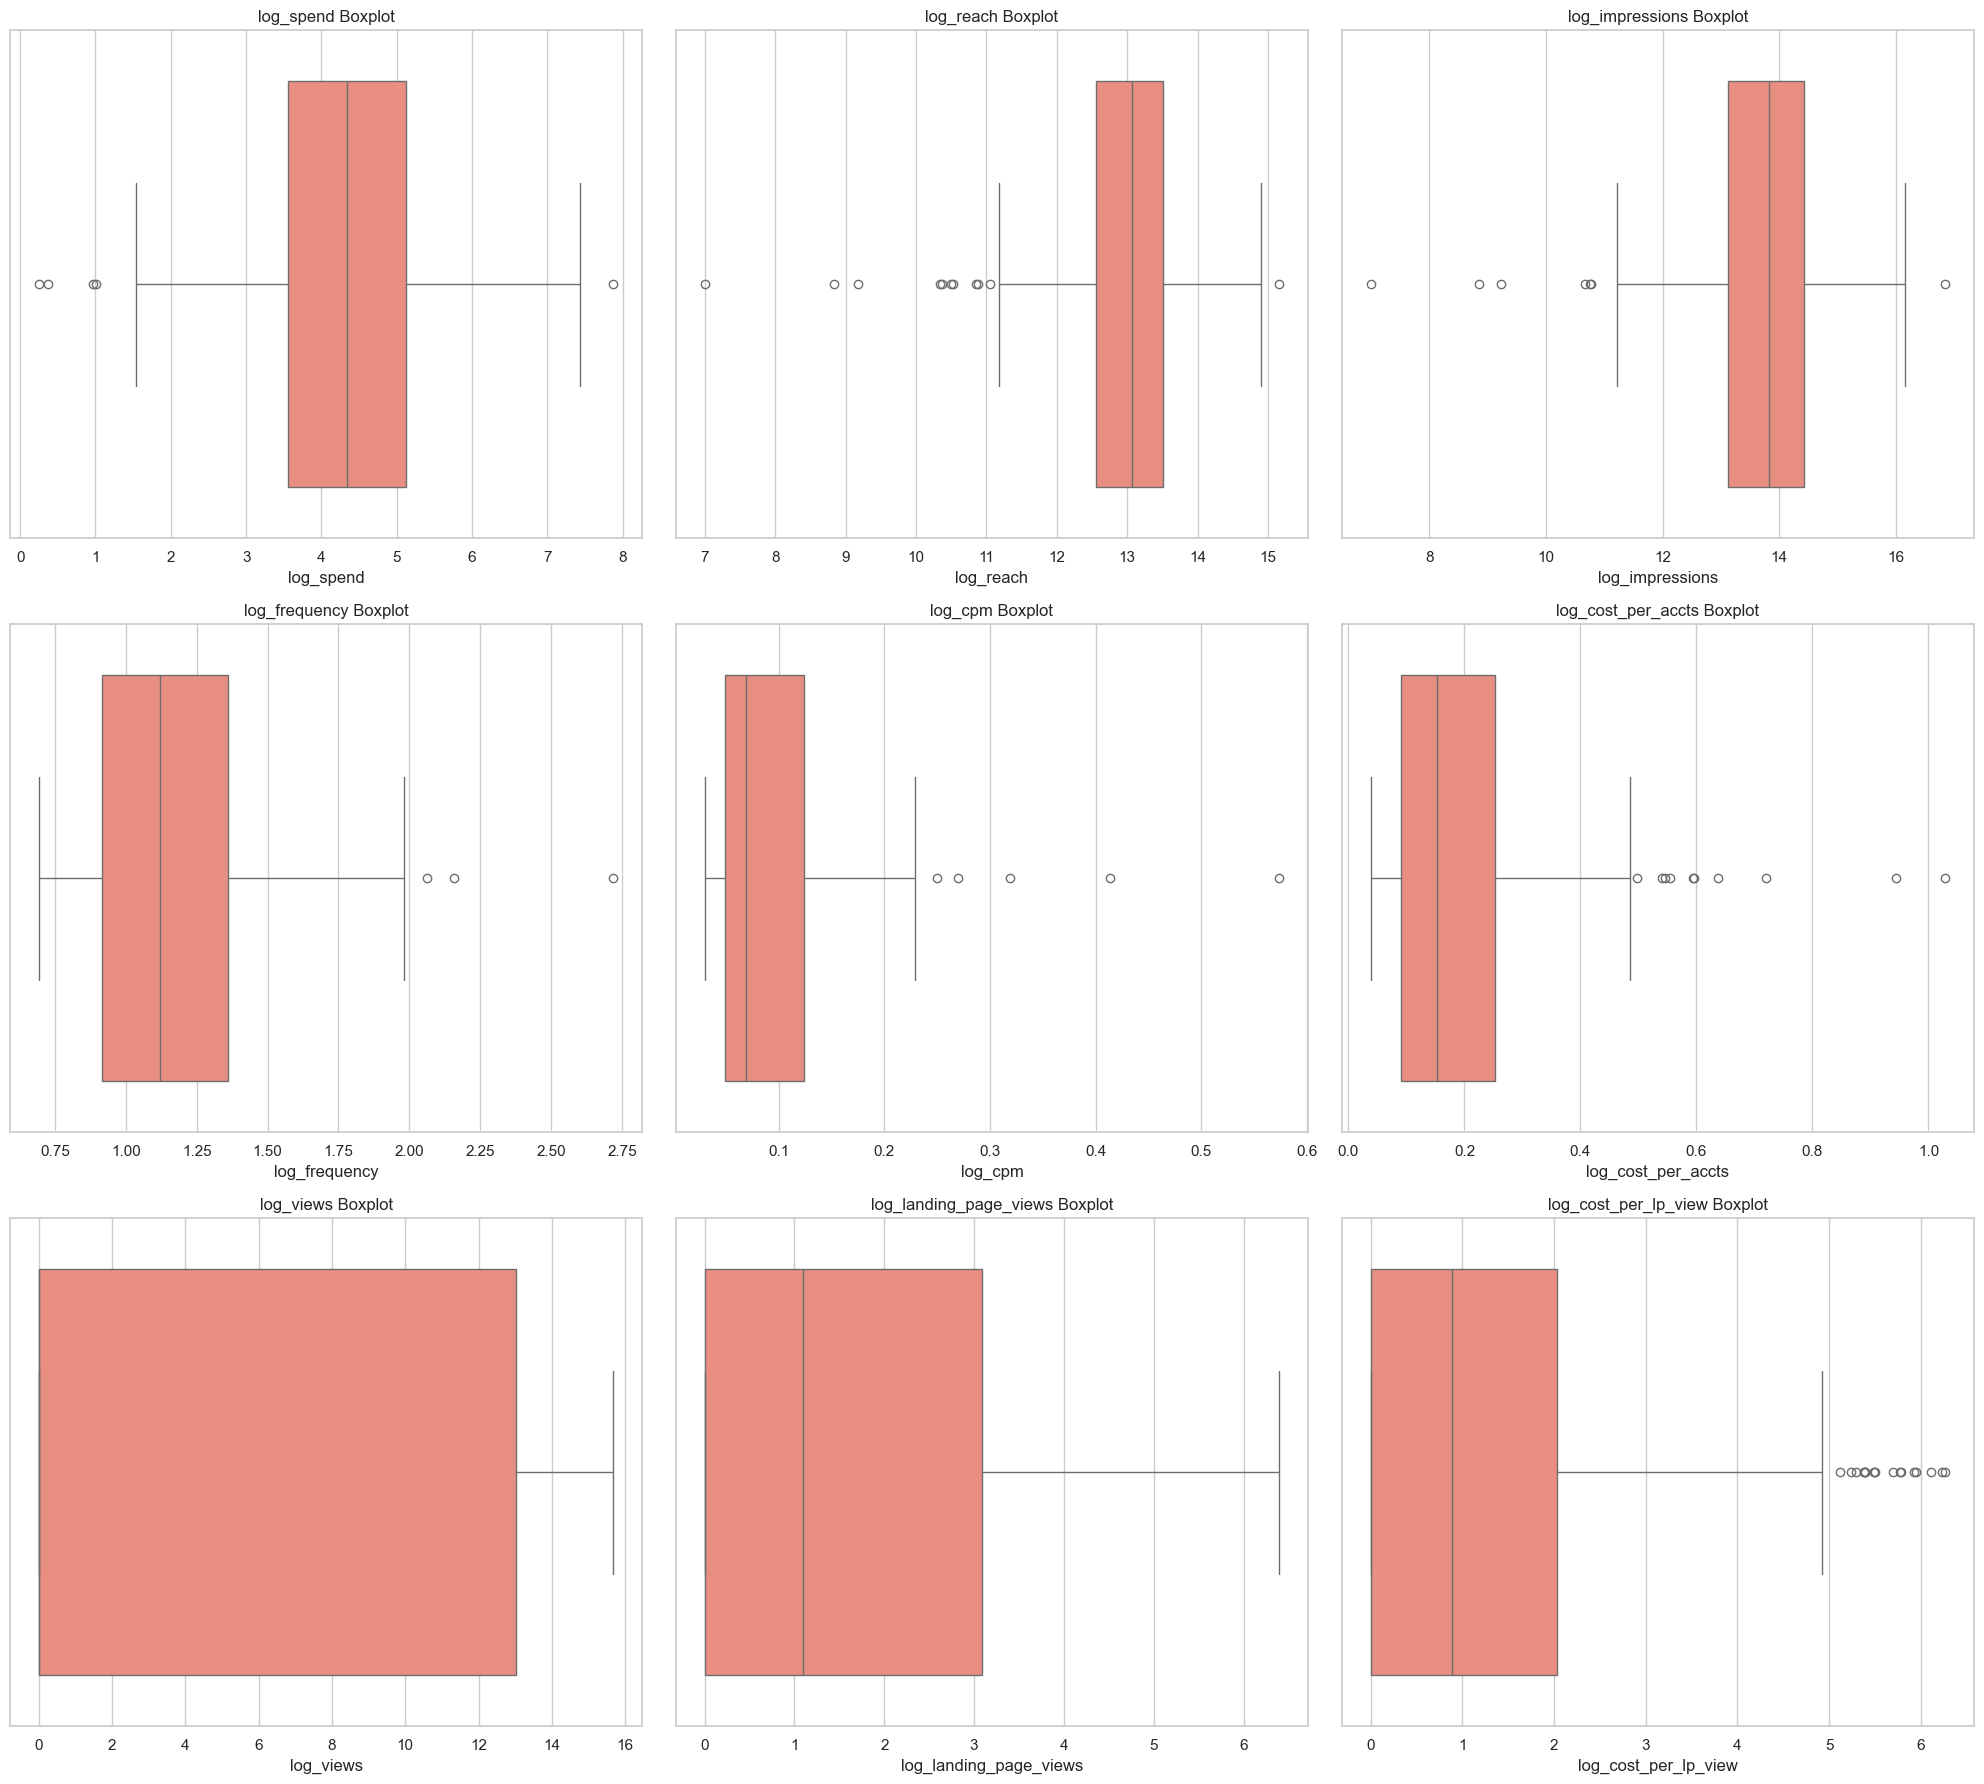

In [52]:
plt.figure(figsize=(20, 18))
for i, feature in enumerate(plot_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=reach_df[feature], color='salmon')
    plt.title(f"{feature} Boxplot")
plt.tight_layout()
plt.show()

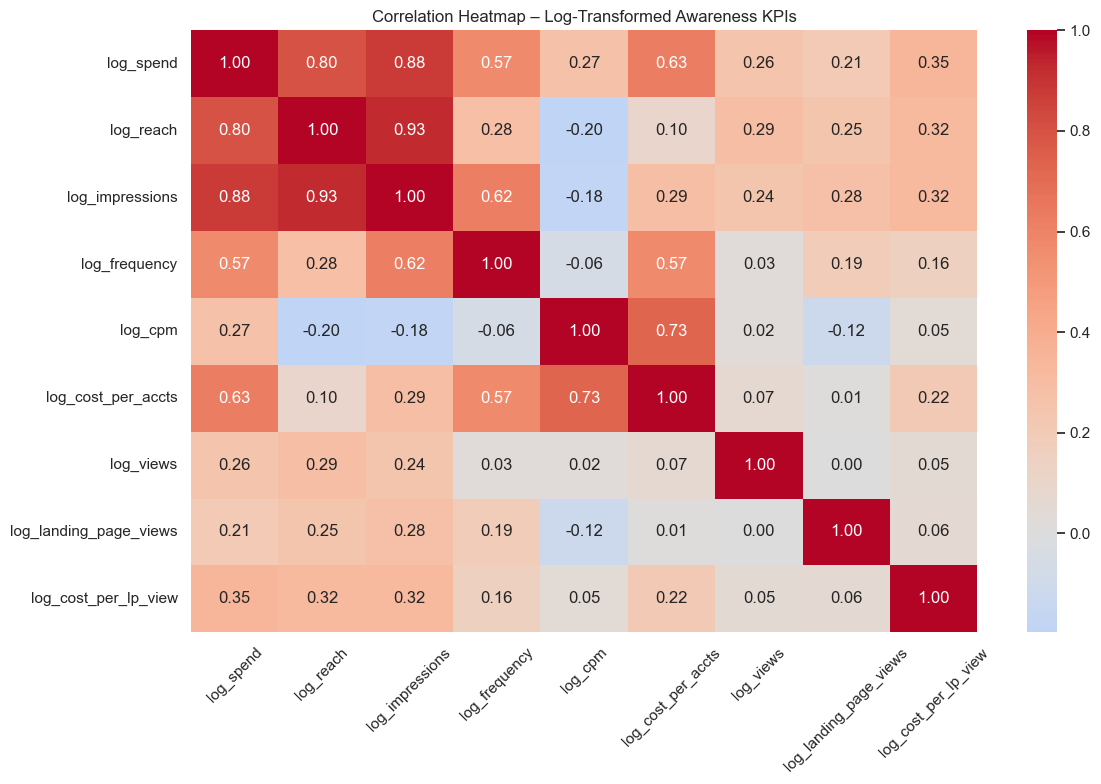

In [53]:
heatmap_features = [
    'log_spend', 'log_reach', 'log_impressions', 'log_frequency',
    'log_cpm', 'log_cost_per_accts', 'log_views',
    'log_landing_page_views', 'log_cost_per_lp_view'
]
plt.figure(figsize=(12, 8))
sns.heatmap(reach_df[heatmap_features].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap – Log-Transformed Awareness KPIs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Heatmap – Awareness Campaign KPIs

We visualized the correlation matrix between key log-transformed KPIs for awareness campaigns. This helps us:

- Detect multicollinearity (e.g., between `log_reach` and `log_impressions`)
- Identify strong predictors of cost metrics like `log_cpm` or `log_cost_per_lp_view`

This heatmap will guide us during feature selection and model development in the next phase.


In [54]:
app_installs_df = df[df['Result indicator'] == 'actions:mobile_app_install'].copy()


In [55]:
app_installs_df.columns


Index(['Campaign name', 'Campaign Delivery', 'Platforme', 'Device',
       'Placement', 'Objective', 'Result indicator', 'Ad set budget',
       'Ad set budget type', 'Amount spent', 'Attribution setting',
       'Date created', 'Starts', 'Ends', 'Reach', 'Impressions', 'Frequency',
       'Results', 'Cost per results', 'Thruplays rate %', 'Result rate',
       'Views', 'Clicks (all)', 'Purchases', 'CPC (all) (USD)', 'CTR (all)',
       'Cost per 1,000 Accounts Center accounts reached (USD)',
       'CPM (cost per 1,000 impressions) (USD)',
       '3-second video plays rate per impressions', 'Page engagement',
       'Facebook follows or likes', 'Post comments', 'Post engagements',
       'Post reactions', 'Post saves', 'Post shares', 'Photo views',
       'Cost per Page engagement (USD)', 'Cost per follow or like (USD)',
       'Cost per post engagement (USD)', '3-second video plays', 'ThruPlays',
       'Video plays at 25%', 'Video plays at 50%', 'Video plays at 75%',
       'Video p

In [56]:
install_kpis = [
    'Amount spent', 'Reach', 'Impressions', 'Clicks (all)', 'Landing page views',
    'App installs', 'Cost per app install (USD)', 'CTR (all)', 'CPC (all) (USD)'
]

app_installs_df[install_kpis].skew()


Amount spent                  2.296858
Reach                         0.930575
Impressions                   2.107264
Clicks (all)                  1.990279
Landing page views            1.756179
App installs                  1.916142
Cost per app install (USD)    2.707291
CTR (all)                     1.195512
CPC (all) (USD)               0.389350
dtype: float64

In [57]:
app_installs_df['log_spend'] = np.log1p(app_installs_df['Amount spent'])
app_installs_df['log_reach'] = np.log1p(app_installs_df['Reach'])
app_installs_df['log_impressions'] = np.log1p(app_installs_df['Impressions'])
app_installs_df['log_clicks'] = np.log1p(app_installs_df['Clicks (all)'])
app_installs_df['log_lp_views'] = np.log1p(app_installs_df['Landing page views'])
app_installs_df['log_installs'] = np.log1p(app_installs_df['App installs'])
app_installs_df['log_cpi'] = np.log1p(app_installs_df['Cost per app install (USD)'])
app_installs_df['log_ctr'] = np.log1p(app_installs_df['CTR (all)'])
app_installs_df['log_cpc'] = np.log1p(app_installs_df['CPC (all) (USD)'])


In [58]:
log_kpis = [
    'log_spend', 'log_reach', 'log_impressions', 'log_clicks',
    'log_lp_views', 'log_installs', 'log_cpi', 'log_ctr', 'log_cpc'
]

app_installs_df[log_kpis].skew()


log_spend         -0.099888
log_reach         -0.537644
log_impressions   -0.285777
log_clicks        -0.165504
log_lp_views       0.743888
log_installs      -0.290173
log_cpi            0.984967
log_ctr            0.938490
log_cpc            0.362106
dtype: float64

## Final Skewness Analysis – App Install Campaigns

Post-log transformation, most metrics now show minimal skewness and are ready for modeling:

| Feature             | Skewness | Status         |
|---------------------|----------|----------------|
| `log_spend`         | -0.10    | ✅ Excellent    |
| `log_reach`         | -0.54    | ✅ Acceptable   |
| `log_impressions`   | -0.29    | ✅ Very good    |
| `log_clicks`        | -0.17    | ✅ Very good    |
| `log_lp_views`      | 0.74     | ✅ Usable       |
| `log_installs`      | -0.29    | ✅ Very good    |
| `log_cpi`           | 0.98     | ⚠️ Monitor skew |
| `log_ctr`           | 0.94     | ⚠️ Slight skew  |
| `log_cpc`           | 0.36     | ✅ Acceptable   |



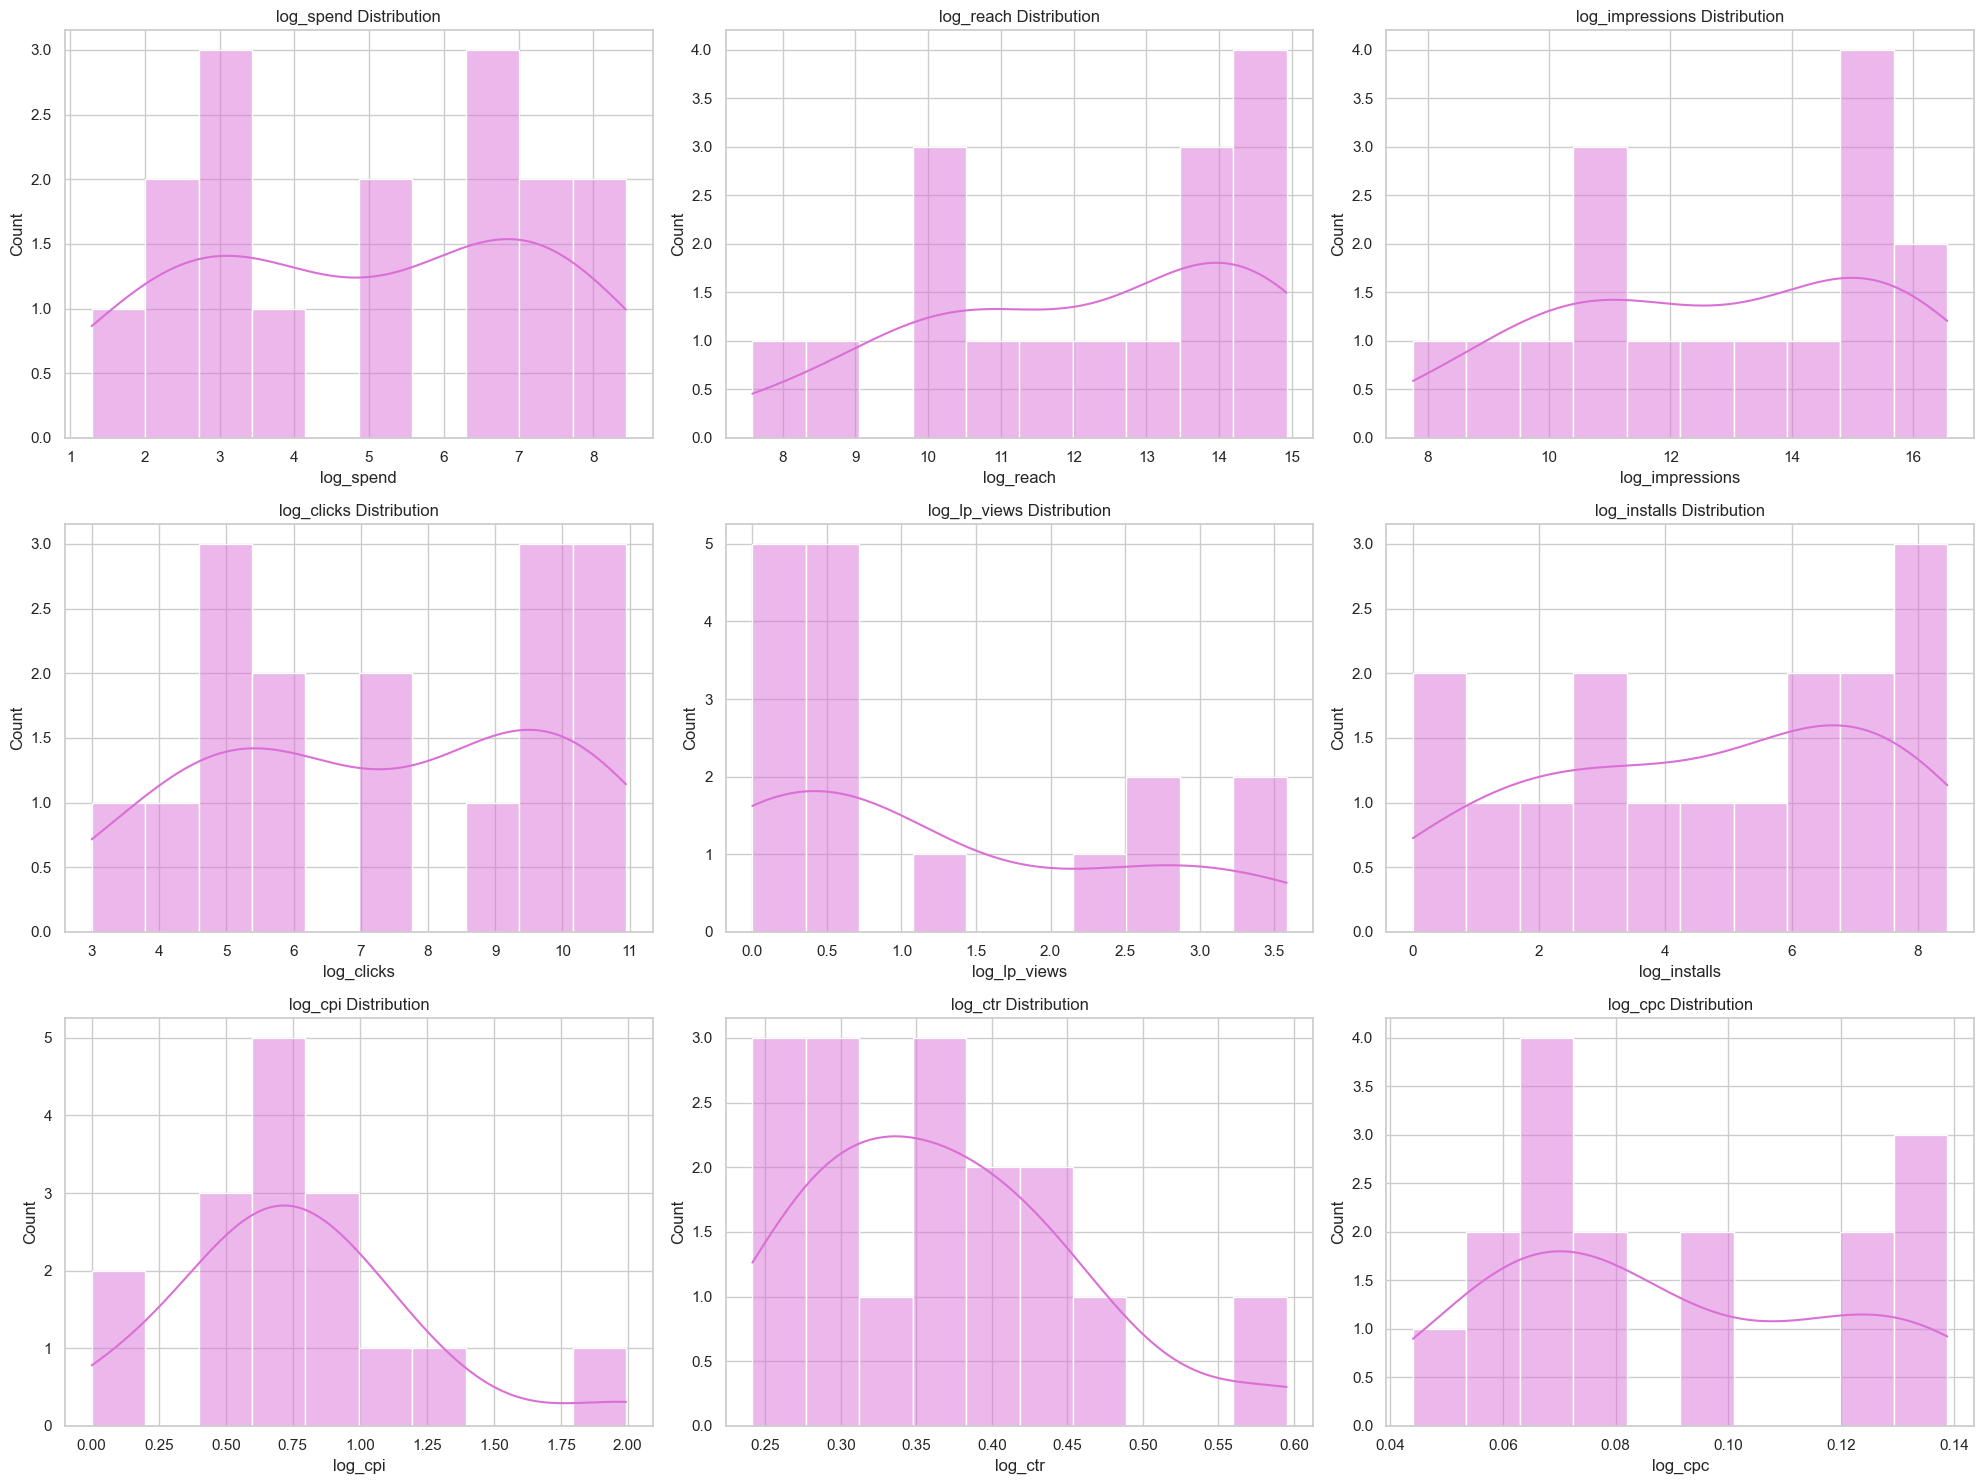

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i, feature in enumerate(log_kpis):
    plt.subplot(3, 3, i + 1)
    sns.histplot(app_installs_df[feature], kde=True, bins=10, color='orchid')
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()


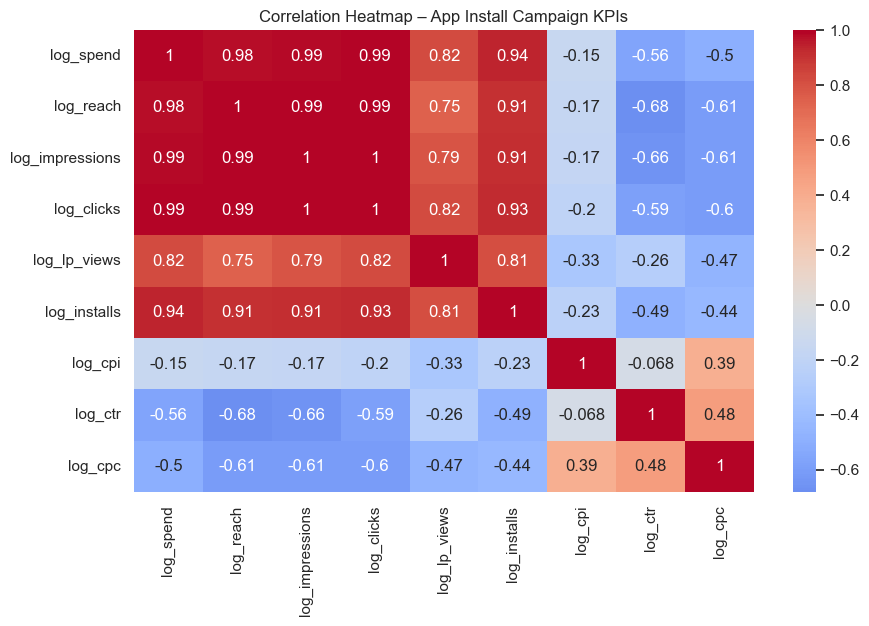

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(app_installs_df[log_kpis].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap – App Install Campaign KPIs")
plt.show()


## Conclusion: 
The data is now model-ready. These `log_` features will be used for building predictive models targeting installs and cost-efficiency.


##  Final EDA Conclusion – Meta Ads Campaign Analysis for Orange Tunisie

Over the course of this phase, we performed a complete, segmented exploratory data analysis (EDA) on Meta Ads campaign data provided by **Orange Tunisie**. The dataset was segmented by `Result indicator` to align more precisely with campaign objectives and optimization goals.

###  Campaign Segments Analyzed:

| Result Indicator                         | Campaign Type        | Objective               |
|------------------------------------------|----------------------|--------------------------|
| `actions:link_click`                     | Traffic              | Increase website traffic |
| `actions:post_engagement`                | Engagement           | Boost post interactions  |
| `video_thruplay_watched_actions`         | Video Engagement     | Maximize video views     |
| `reach`                                  | Awareness            | Expand audience reach    |
| `actions:mobile_app_install`             | App Installs         | Drive app downloads      |

---

###  1. Data Cleaning & Preparation

- All missing values were handled manually and replaced with `0` where appropriate.
- Loaded the dataset into Python and verified column consistency and data types.
- Segmented campaign types were filtered using `.copy()` to avoid `SettingWithCopyWarning`.

---

###  2. Segmentation by Result Indicator

- Rather than segmenting by the general `Objective`, we used the more precise `Result indicator` to define each campaign's optimization goal.
- This led to clearer insights and avoided mixed-metric distributions during analysis.

---

###  3. Skewness Analysis and Transformation

- Most KPIs (e.g., CTR, CPC, Impressions, Cost metrics) were highly right-skewed.
- Applied `np.log1p()` to reduce skewness across all applicable features.
- Verified post-transformation skewness to ensure more normal distributions.
- Left-skewed or mildly skewed features were documented but left as-is, especially for tree-based models.

---

###  4. Visual Analysis Conducted

- Histograms with KDE overlays to verify distribution normality.
- Boxplots to detect and visualize outliers.
- Correlation heatmaps to identify strong feature relationships and guide modeling choices.

---

###  5. Segment-Wise EDA Summary

| Segment         | Key Transformed KPIs                            | Notes |
|----------------|--------------------------------------------------|-------|
| **Traffic**     | `log_CTR`, `log_CPC`, `log_spend`, `log_reach`  | CTR and CPC were highly skewed; transformed for prediction |
| **Engagement**  | `log_post_eng`, `log_reactions`, `log_spend`    | Strong skew in reactions and shares; log1p applied |
| **Video**       | `log_thruplays`, `log_video_100`, `log_cpm`     | Most video KPIs skewed; now model-safe |
| **Awareness**   | `log_reach`, `log_impressions`, `log_frequency` | Focus on efficiency: reach, CPM, cost per 1,000 impressions |
| **App Installs**| `log_installs`, `log_cpi`, `log_ctr`            | Small but rich dataset; normalized for modeling installs |

---

###  6. Modeling-Ready Output

- Each dataset now includes log-transformed versions of skewed metrics.
- These `log_` features will be used in model training.
- Extreme value influence has been minimized.
- Each campaign segment is now modeling-safe and analytically robust.

---

###  Final Remarks

You now have:

- ✅ Cleaned, structured datasets for each campaign type
- ✅ Log-transformed KPIs with verified normalization
- ✅ Distribution plots and heatmaps to guide feature selection
- ✅ Fully segmented and documented EDA notebooks

---

###  Next Step: Feature Engineering

In the upcoming phase, we will:

1. Encode campaign attributes (platform, placement, device)
2. Create time-based features from `Starts` (e.g., day, month)
3. Finalize input/output variables for model training

This EDA phase has ensured we are entering the modeling phase with precision, clarity, and insight.

 **Ready for Step 4: Feature Engineering**.
